In [6]:
# 1. Handling missing data in titanic dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

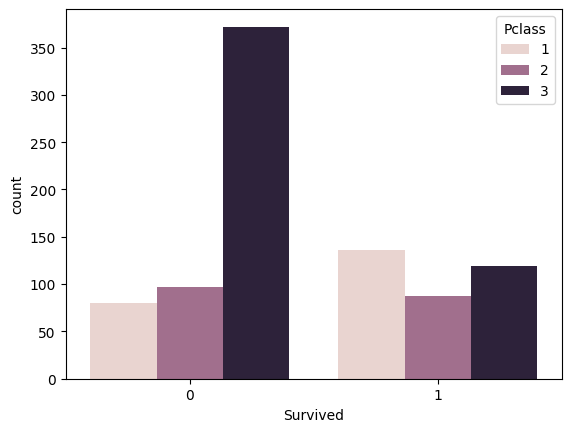

In [8]:
sns.countplot(x='Survived',data=df , hue='Pclass')

C:\Users\PMLS\AppData\Local\Temp\ipykernel_1520\2227527071.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],kde=False)


<Axes: xlabel='Age'>

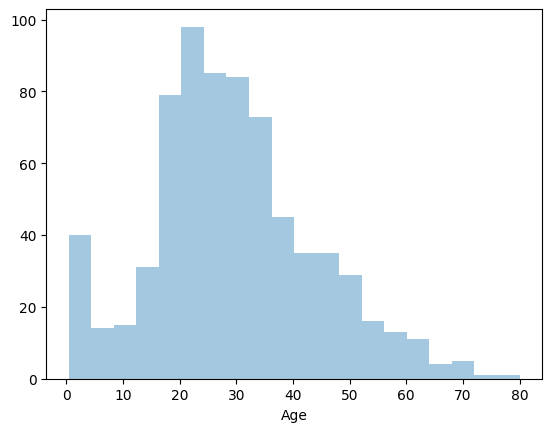

In [13]:
sns.distplot(df['Age'],kde=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

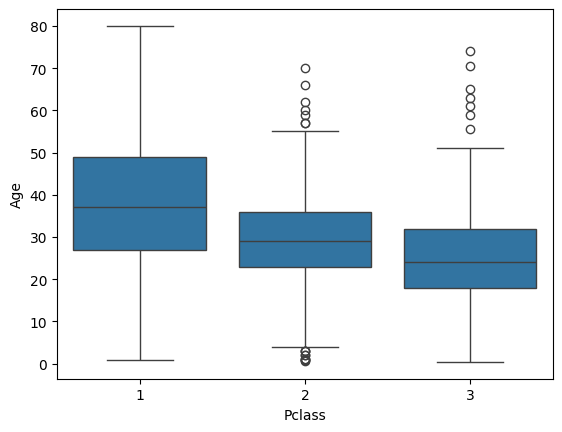

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [18]:
print(df[df['Pclass']==1]['Age'].mean())
print(df[df['Pclass']==2]['Age'].mean())
print(df[df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [24]:
def fill_in_na_values(cols):
    age=cols[0]
    pclass=cols[1]

    if pd.isnull(age):
        if pclass==1:
            return round(df[df['Pclass']==1]['Age'].mean())
        elif pclass==2:
            return round(df[df['Pclass']==2]['Age'].mean())
        elif pclass==3:
            return round(df[df['Pclass']==3]['Age'].mean())
    else:
        return age
        
            

In [25]:
df['Age']=df[['Age','Pclass']].apply(fill_in_na_values,axis=1)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_1520\2192203081.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
C:\Users\PMLS\AppData\Local\Temp\ipykernel_1520\2192203081.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

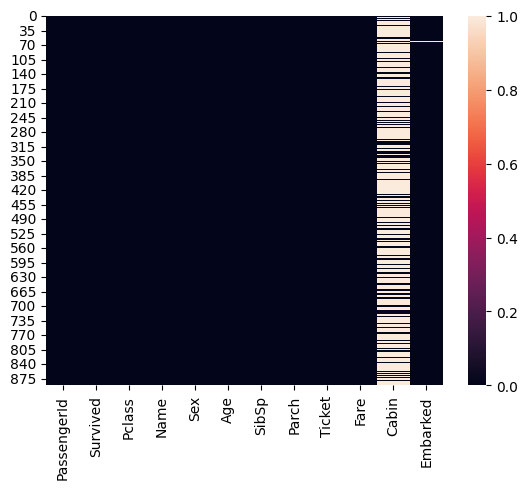

In [27]:
sns.heatmap(df.isnull())

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.drop(['Cabin'],axis=1,inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1]:
#Scaling Features in the Wine Quality Dataset
#importing the libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset
df = pd.read_csv('WineQT.csv')


In [3]:
#Scaling columns except quality and id
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [4]:
# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features] = scaler.fit_transform(df_normalized[features])


In [5]:
# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[features] = scaler.fit_transform(df_standardized[features])


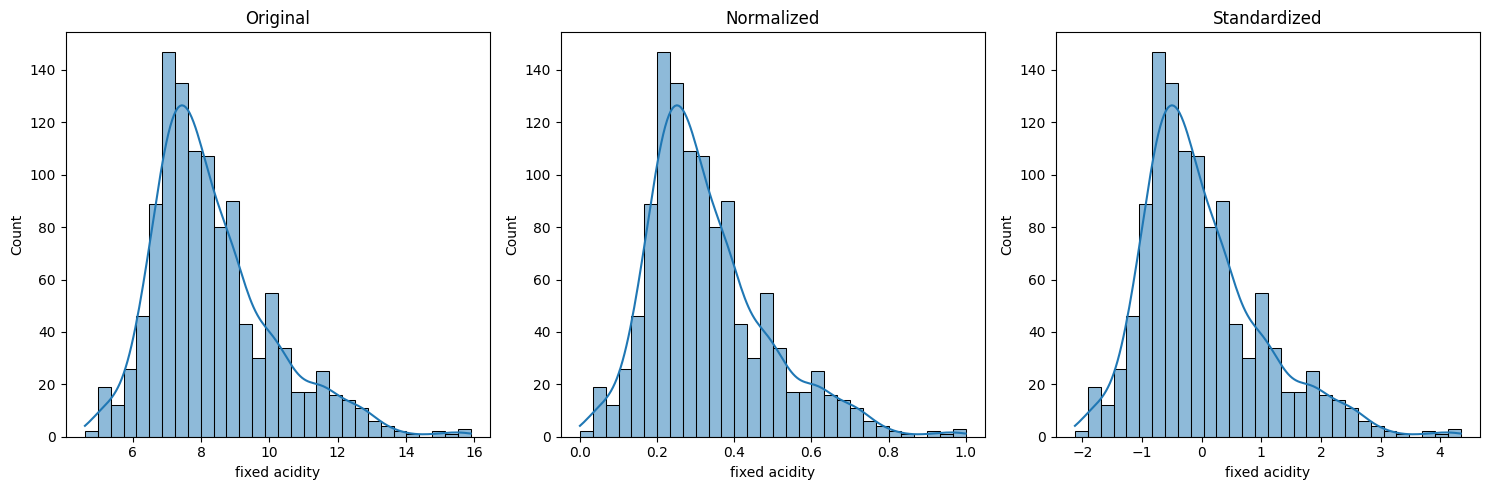

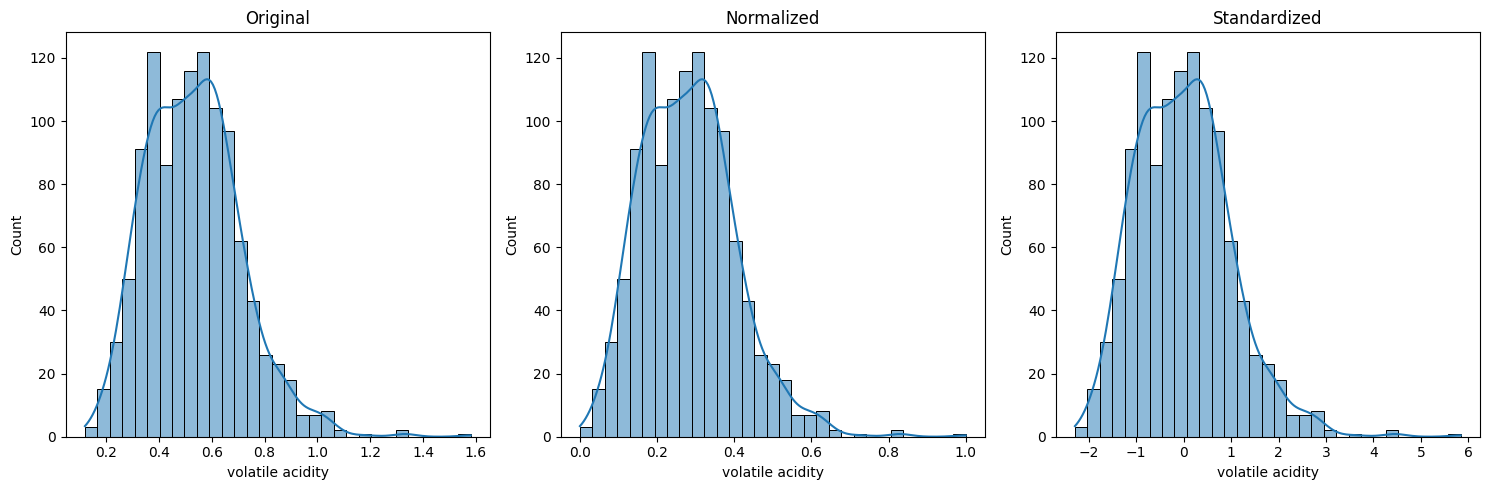

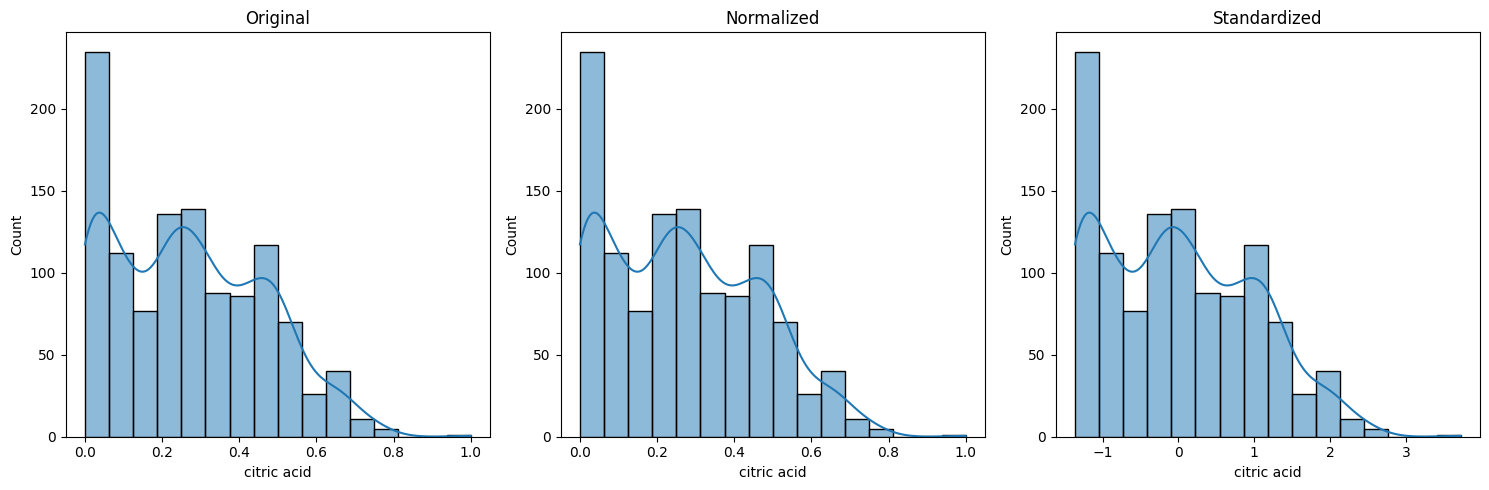

In [6]:
# Plotting function
def plot_distributions(original, normalized, standardized, feature):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    sns.histplot(original[feature], kde=True, ax=axes[0]).set_title('Original')
    sns.histplot(normalized[feature], kde=True, ax=axes[1]).set_title('Normalized')
    sns.histplot(standardized[feature], kde=True, ax=axes[2]).set_title('Standardized')
    plt.tight_layout()
    plt.show()

# Analyzing the distribution of a few features
for feature in features[:3]:  # For the first 3 features
    plot_distributions(df, df_normalized, df_standardized, feature)


In [2]:
#Handling Outliers in the Boston Housing Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('BostonHousing.csv')

# Display the first few rows of the dataset
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


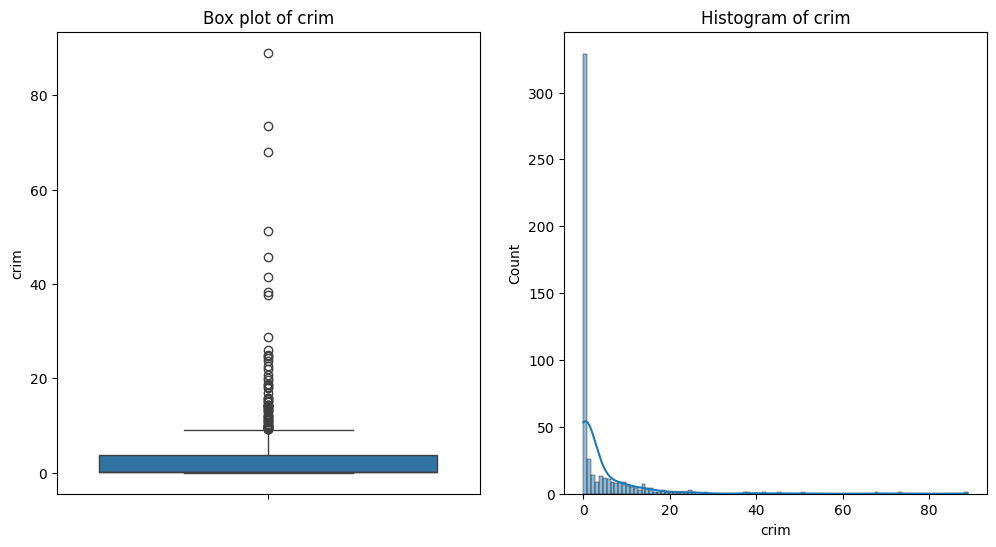

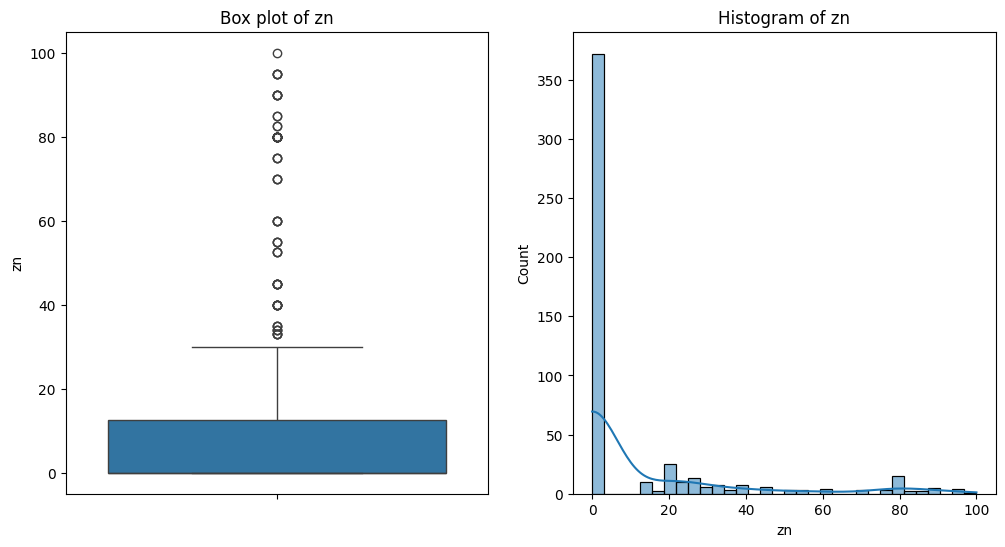

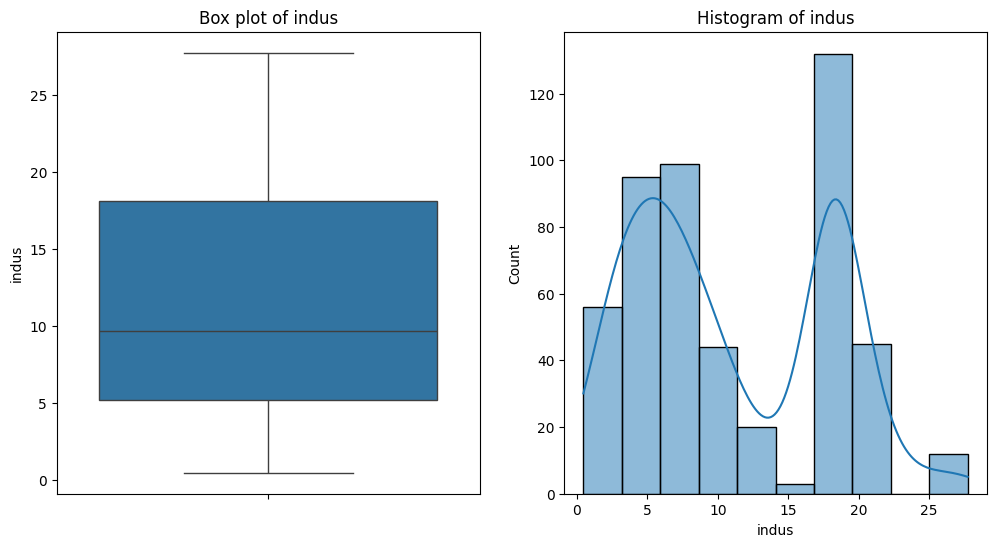

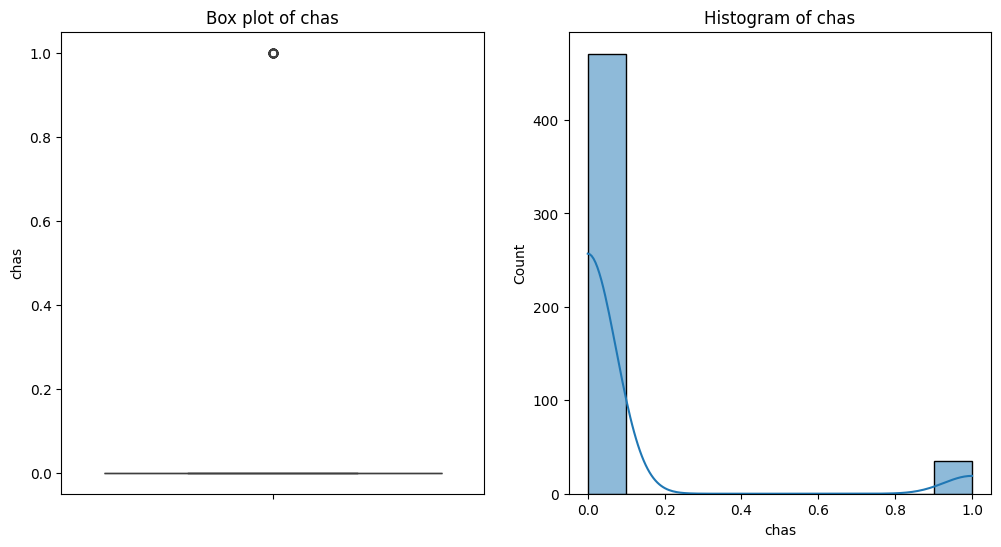

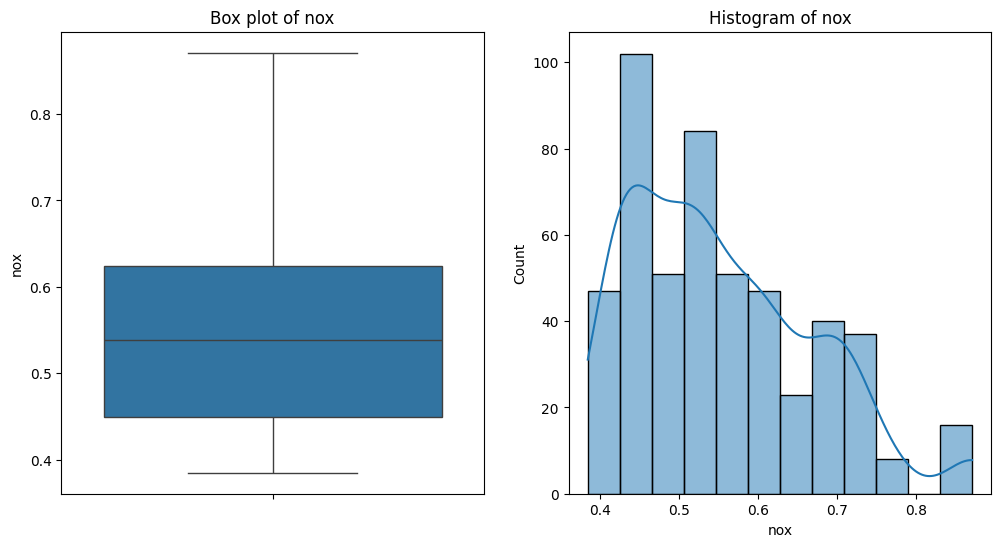

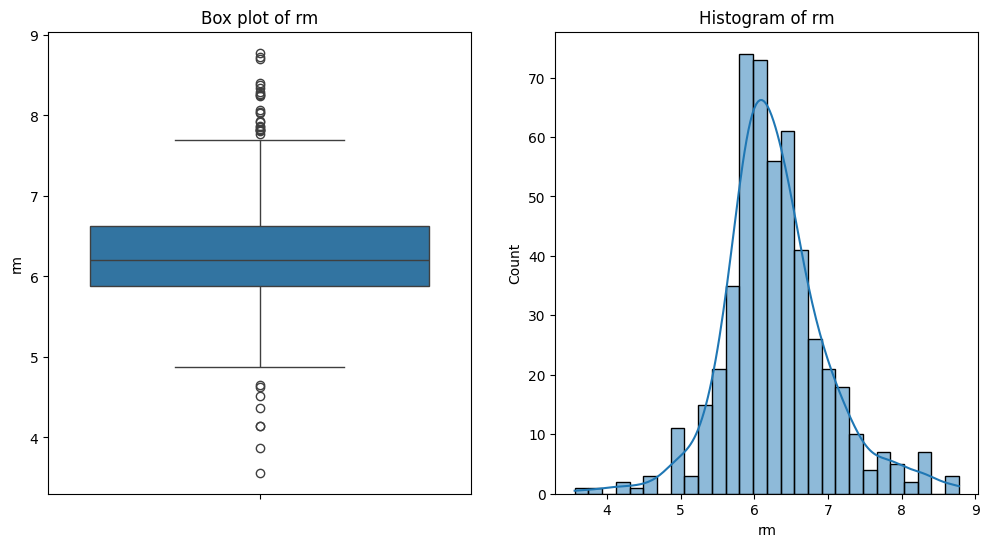

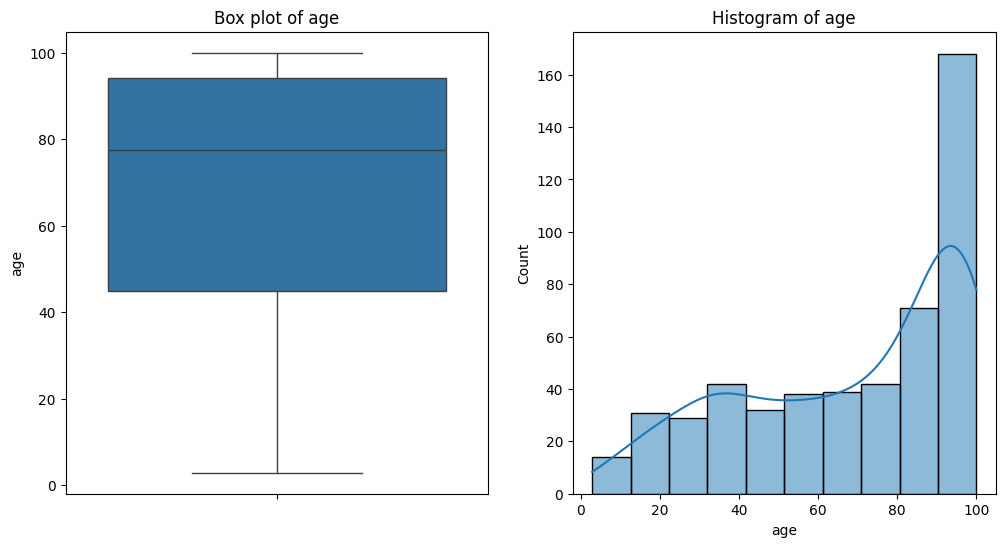

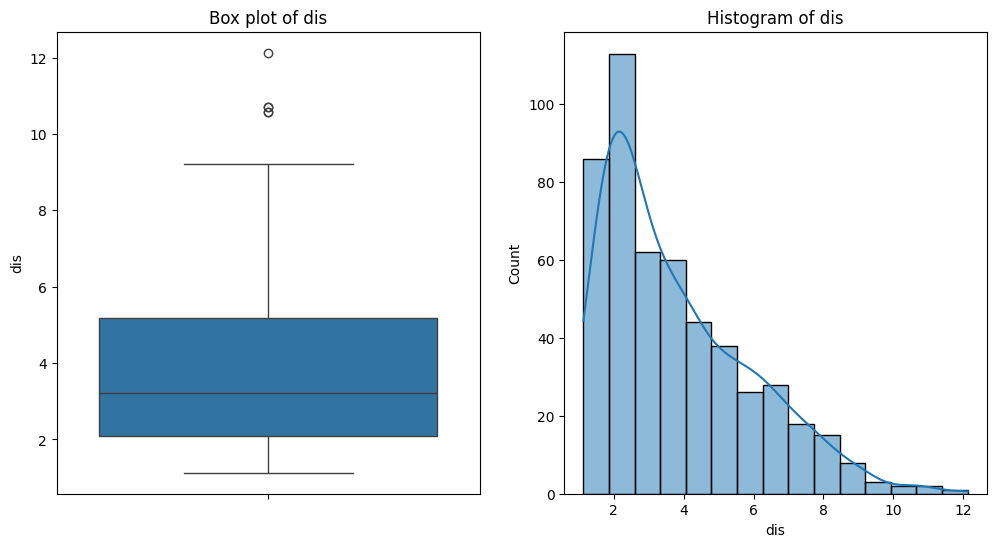

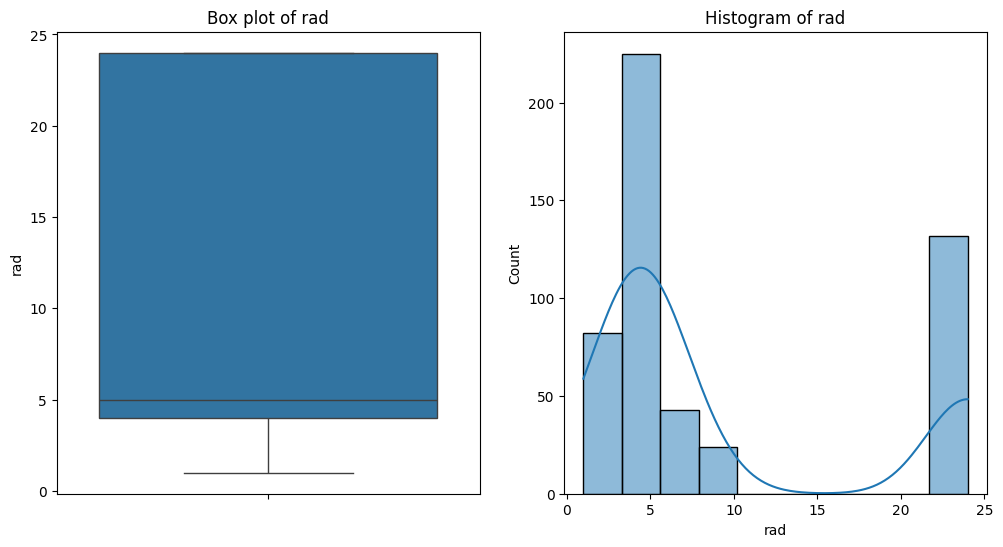

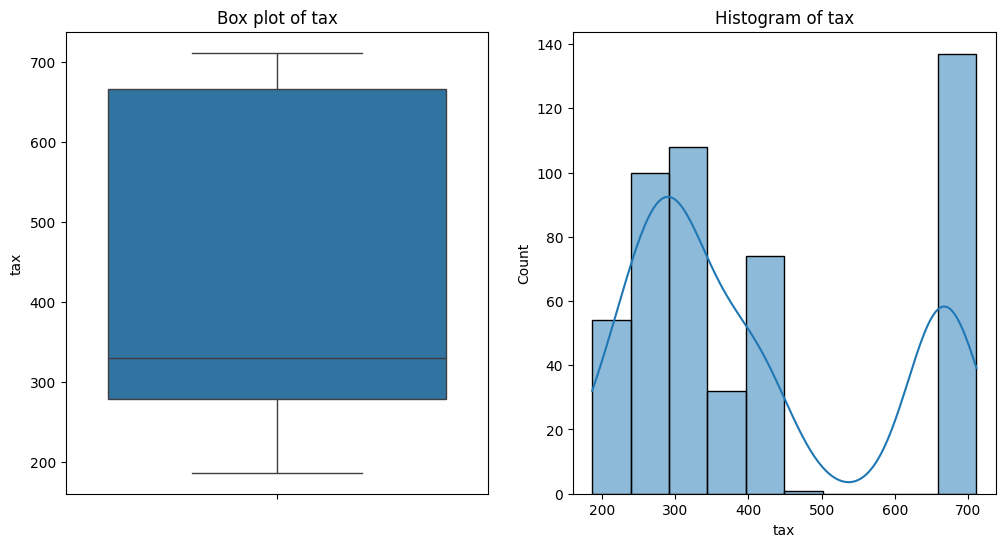

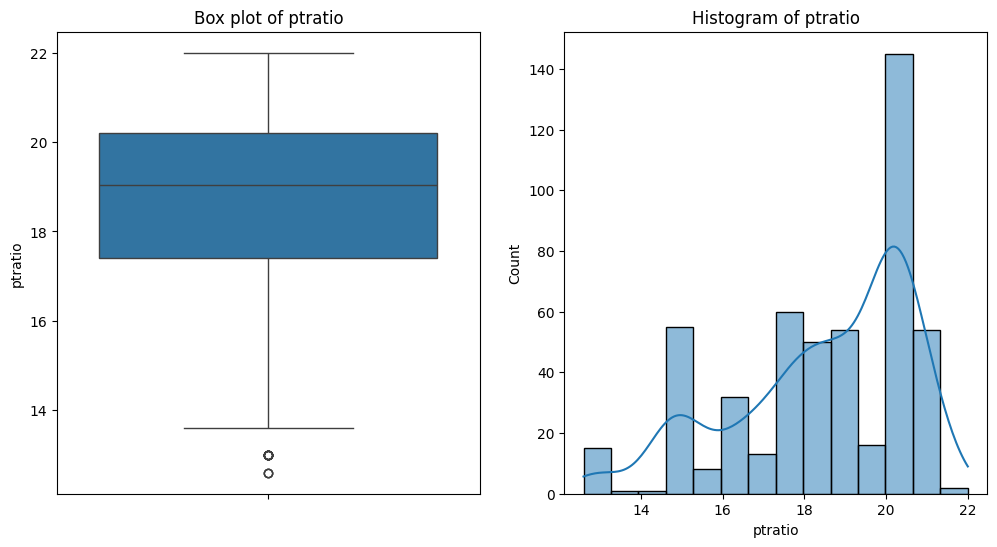

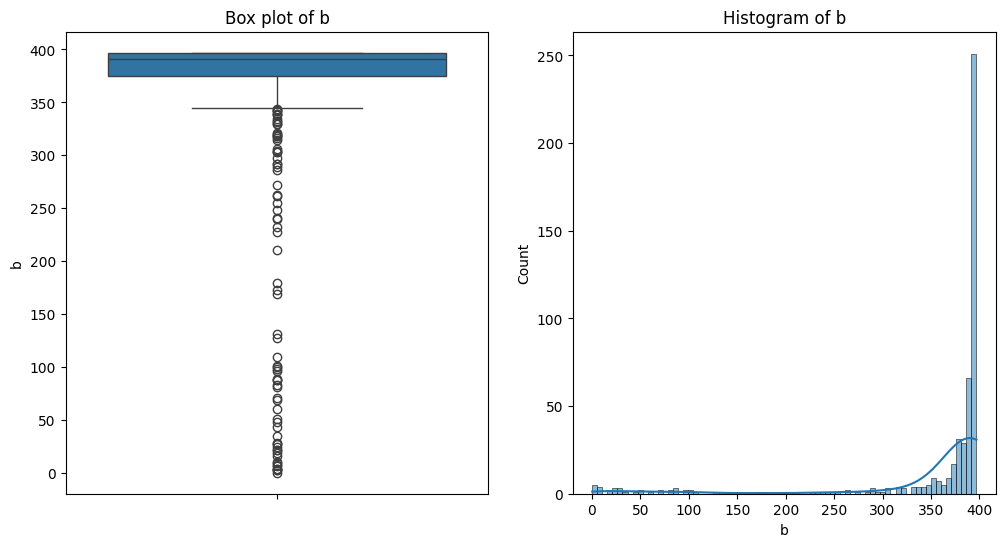

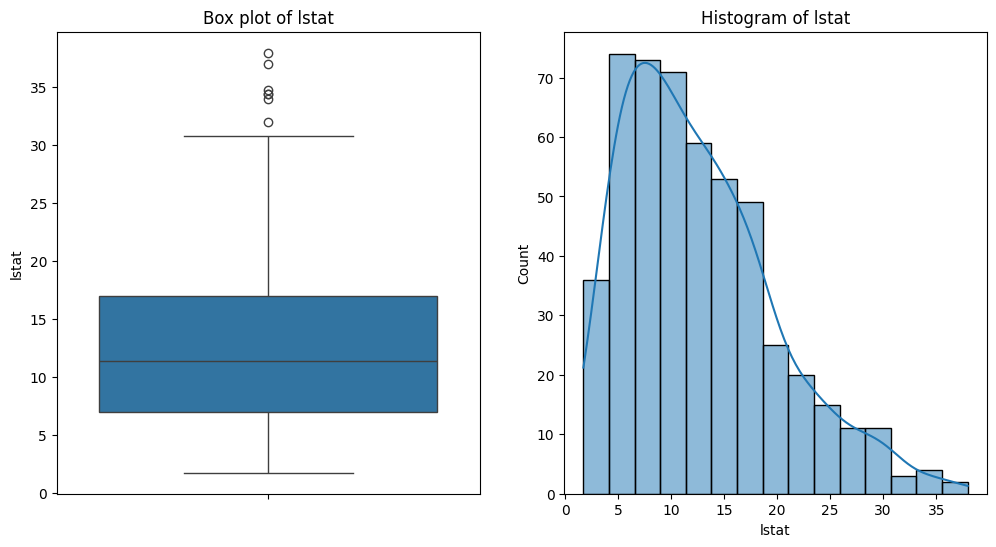

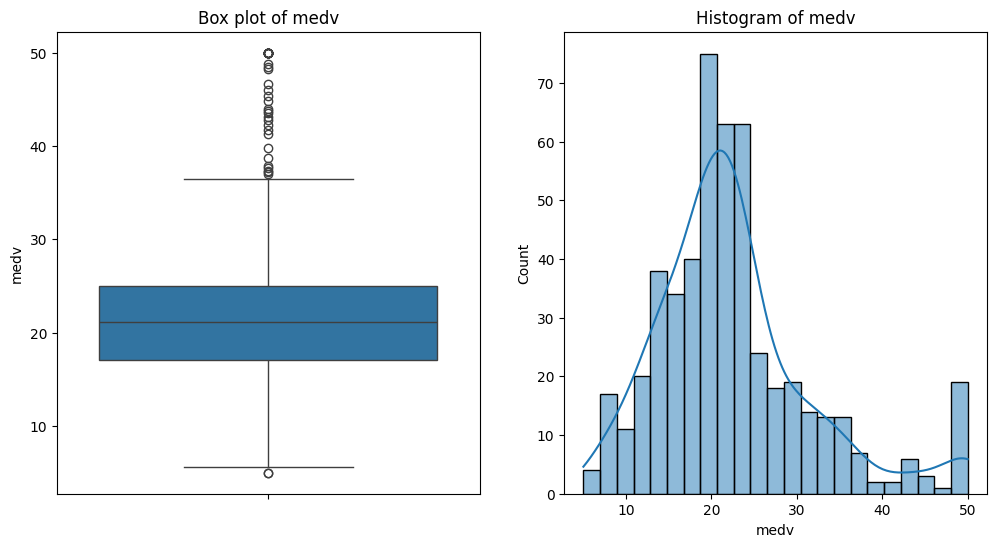

In [3]:
# Visualize the data using box plots and histograms
def visualize_outliers(data, columns):
    for column in columns:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(data[column])
        plt.title(f'Box plot of {column}')
        
        plt.subplot(1, 2, 2)
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        plt.show()

# List of numeric columns in the dataset
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Visualize outliers in numeric columns
visualize_outliers(df, numeric_columns)


In [4]:
# Z-score method to identify outliers
z_scores = np.abs(stats.zscore(df[numeric_columns]))
outliers_z = np.where(z_scores > 3)

# Display outliers
print("Outliers identified by Z-score method:")
print(df.iloc[outliers_z[0]])


Outliers identified by Z-score method:
        crim     zn  indus  chas    nox     rm    age     dis  rad  tax  \
55   0.01311   90.0   1.22     0  0.403  7.249   21.9  8.6966    5  226   
56   0.02055   85.0   0.74     0  0.410  6.383   35.7  9.1876    2  313   
57   0.01432  100.0   1.32     0  0.411  6.816   40.5  8.3248    5  256   
102  0.22876    0.0   8.56     0  0.520  6.405   85.4  2.7147    5  384   
141  1.62864    0.0  21.89     0  0.624  5.019  100.0  1.4394    4  437   
..       ...    ...    ...   ...    ...    ...    ...     ...  ...  ...   
454  9.51363    0.0  18.10     0  0.713  6.728   94.1  2.4961   24  666   
455  4.75237    0.0  18.10     0  0.713  6.525   86.5  2.4358   24  666   
456  4.66883    0.0  18.10     0  0.713  5.976   87.9  2.5806   24  666   
457  8.20058    0.0  18.10     0  0.713  5.936   80.3  2.7792   24  666   
466  3.77498    0.0  18.10     0  0.655  5.952   84.7  2.8715   24  666   

     ptratio       b  lstat  medv  
55      17.9  395.93   4

In [5]:
# IQR method to identify outliers
def iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in each numeric column
outliers_iqr = {}
for column in numeric_columns:
    outliers_iqr[column] = iqr_outliers(df, column)
    print(f'Outliers in {column}:\n', outliers_iqr[column])

# Combine all outliers
all_outliers_iqr = pd.concat(outliers_iqr.values()).drop_duplicates()
print("All outliers identified by IQR method:")
print(all_outliers_iqr)


Outliers in crim:
         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
367  13.5222  0.0   18.1     0  0.631  3.863  100.0  1.5106   24  666   
371   9.2323  0.0   18.1     0  0.631  6.216  100.0  1.1691   24  666   
373  11.1081  0.0   18.1     0  0.668  4.906  100.0  1.1742   24  666   
374  18.4982  0.0   18.1     0  0.668  4.138  100.0  1.1370   24  666   
375  19.6091  0.0   18.1     0  0.671  7.313   97.9  1.3163   24  666   
..       ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
468  15.5757  0.0   18.1     0  0.580  5.926   71.0  2.9084   24  666   
469  13.0751  0.0   18.1     0  0.580  5.713   56.7  2.8237   24  666   
477  15.0234  0.0   18.1     0  0.614  5.304   97.3  2.1007   24  666   
478  10.2330  0.0   18.1     0  0.614  6.185   96.7  2.1705   24  666   
479  14.3337  0.0   18.1     0  0.614  6.229   88.0  1.9512   24  666   

     ptratio       b  lstat  medv  
367     20.2  131.42  13.33  23.1  
371     20.2  366.15   9.53  50.

In [6]:
# Removing outliers identified by Z-score method
df_no_outliers_z = df[(z_scores < 3).all(axis=1)]

# Removing outliers identified by IQR method
df_no_outliers_iqr = df[~df.index.isin(all_outliers_iqr.index)]

# cap the outliers instead of removing them
df_capped = df.copy()
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])
    df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])

# Comparing the dataset before and after handling outliers
print("Original DataFrame shape:", df.shape)
print("DataFrame without outliers (Z-score) shape:", df_no_outliers_z.shape)
print("DataFrame without outliers (IQR) shape:", df_no_outliers_iqr.shape)
print("DataFrame with capped outliers shape:", df_capped.shape)


Original DataFrame shape: (506, 14)
DataFrame without outliers (Z-score) shape: (0, 14)
DataFrame without outliers (IQR) shape: (268, 14)
DataFrame with capped outliers shape: (506, 14)


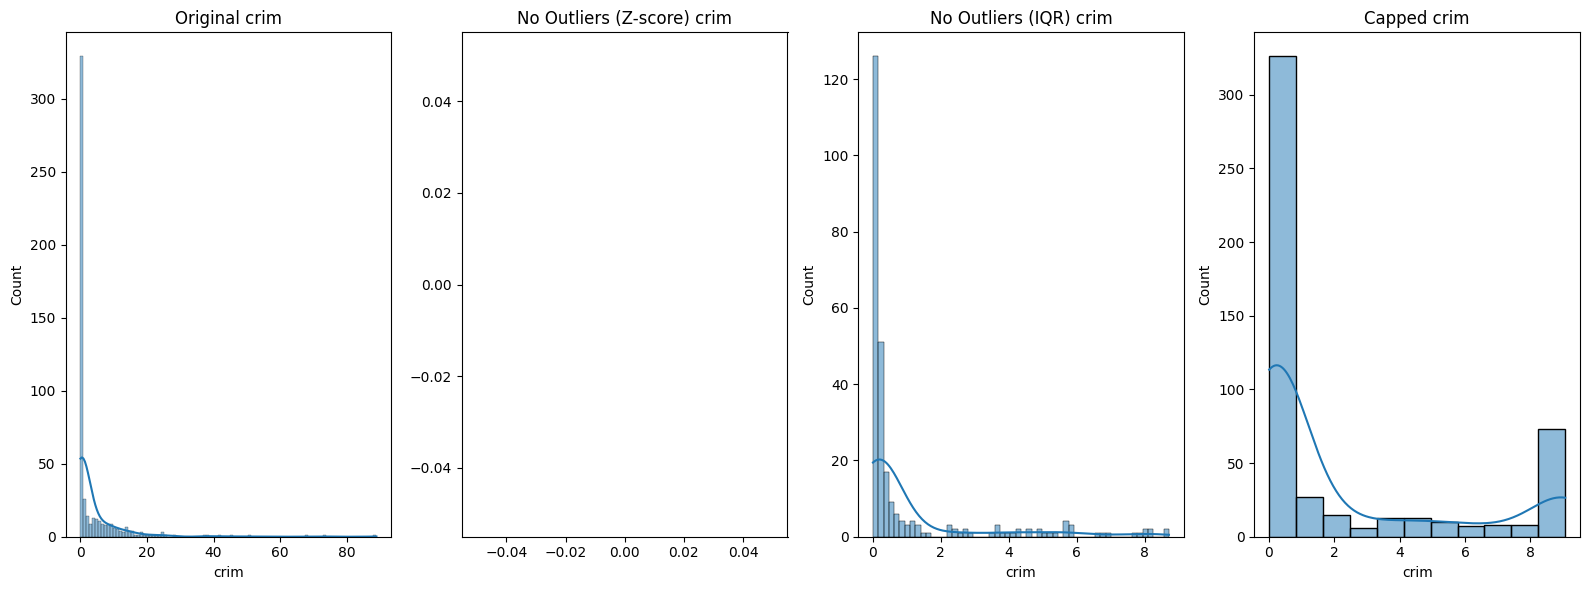

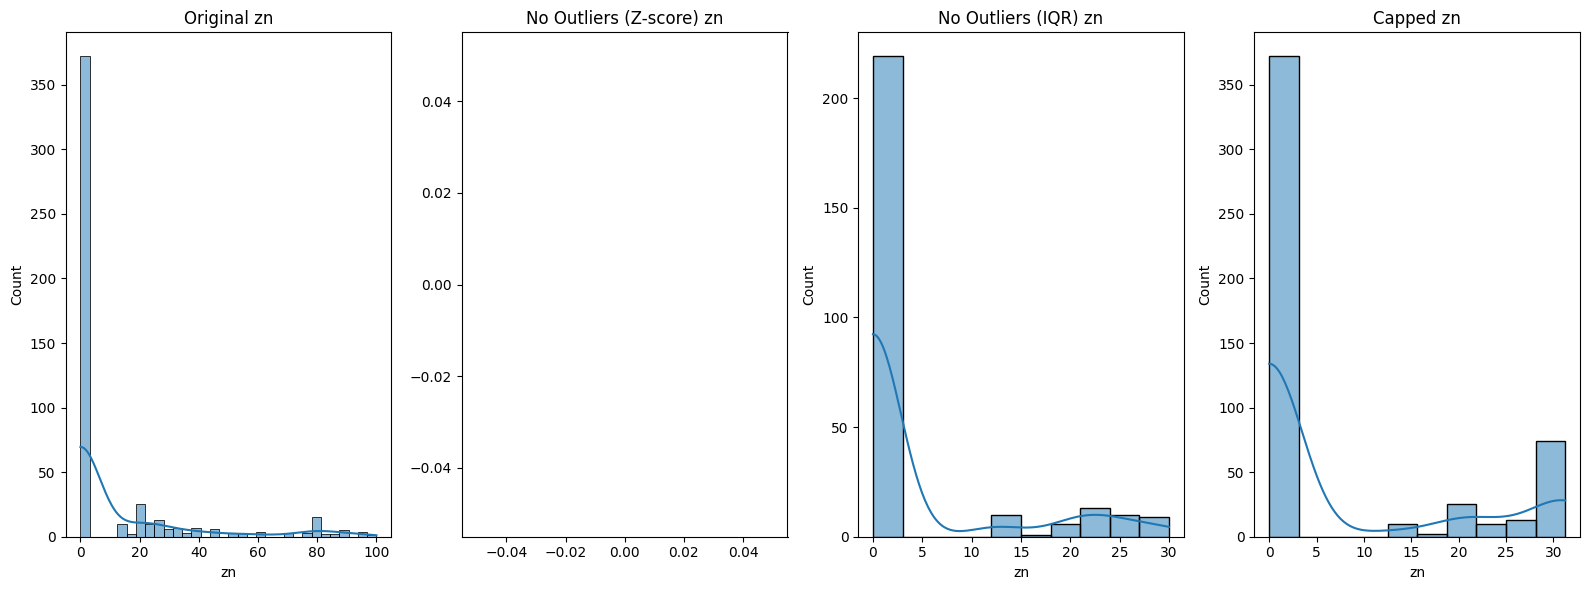

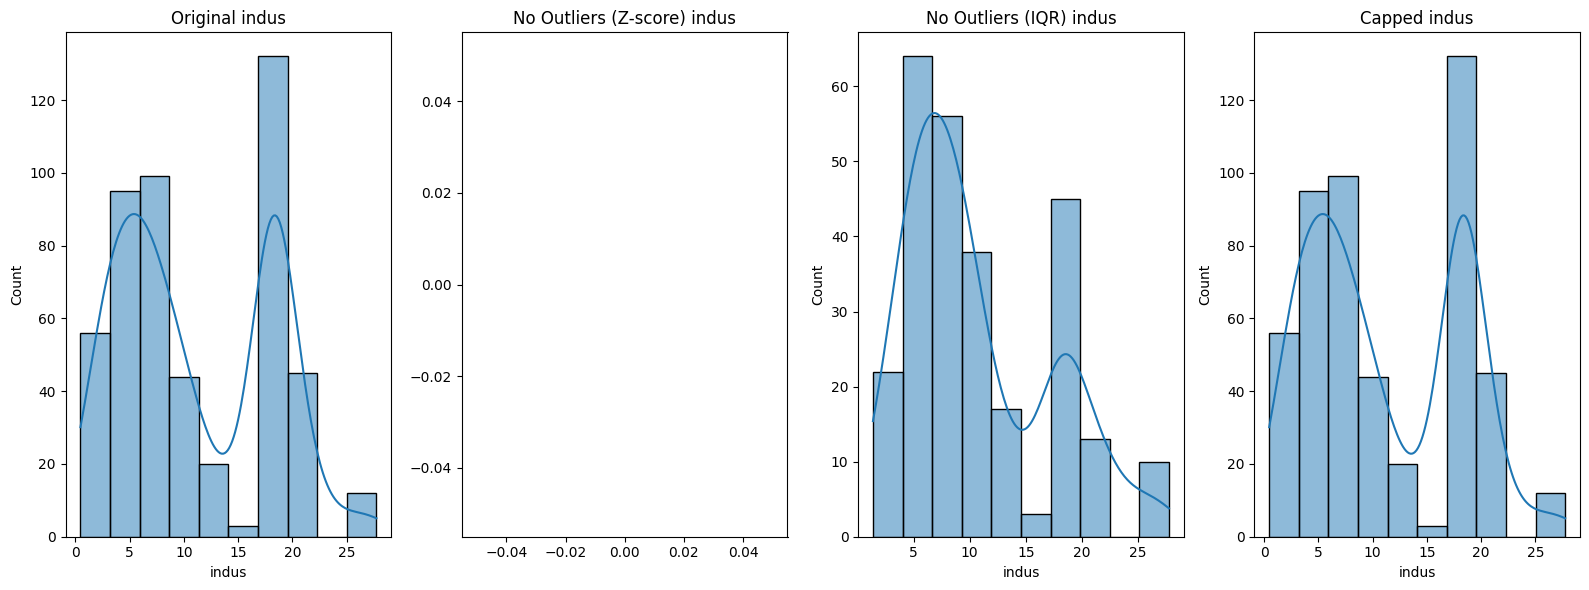

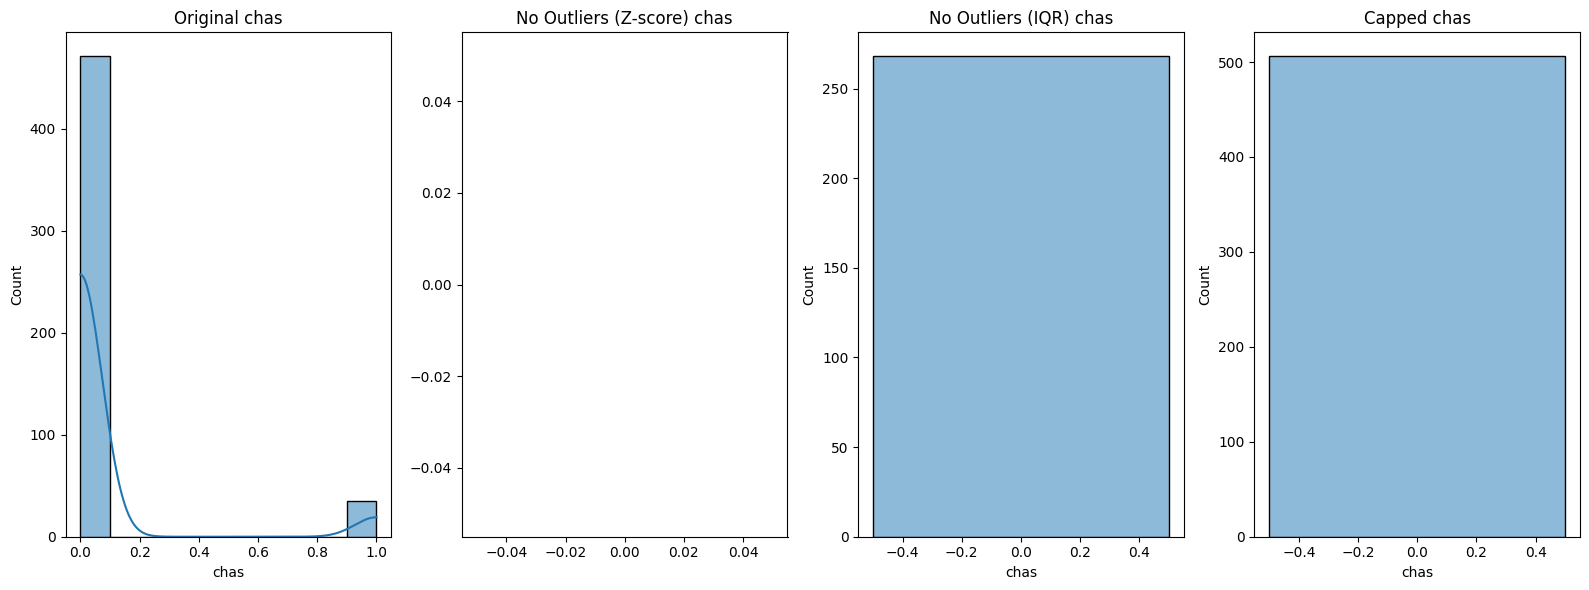

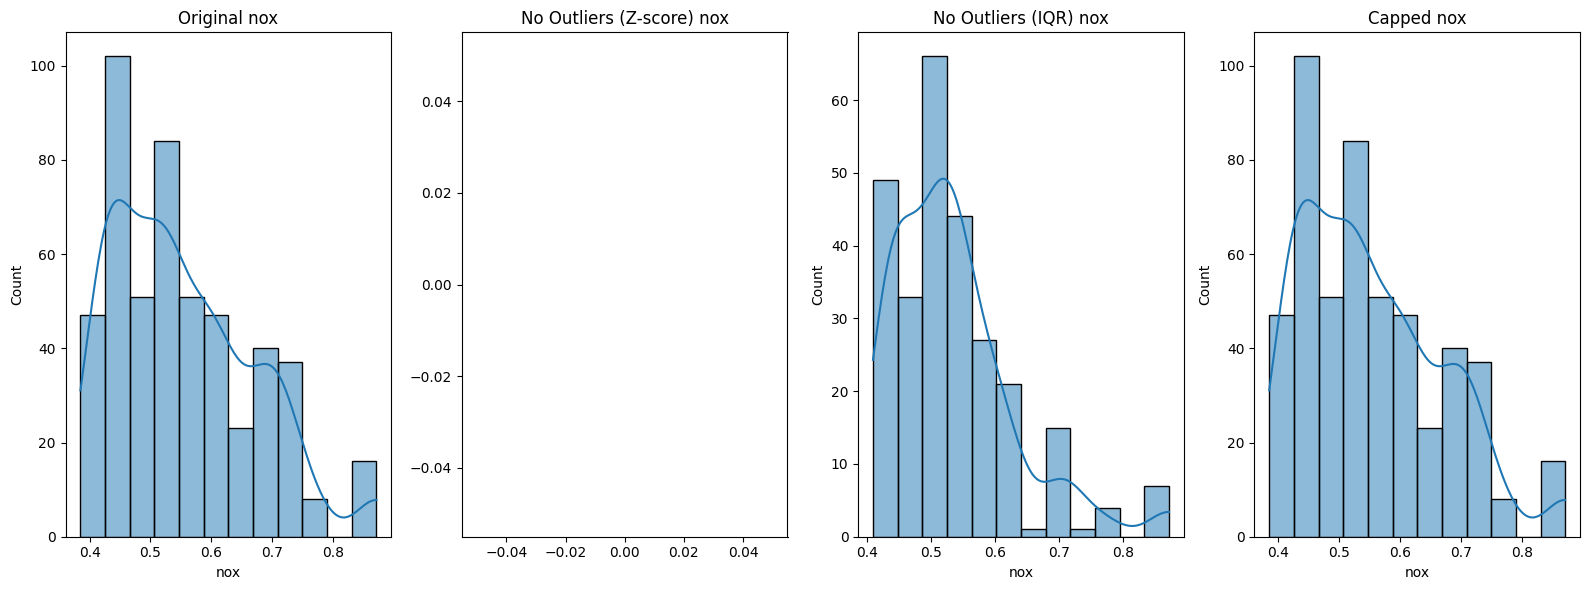

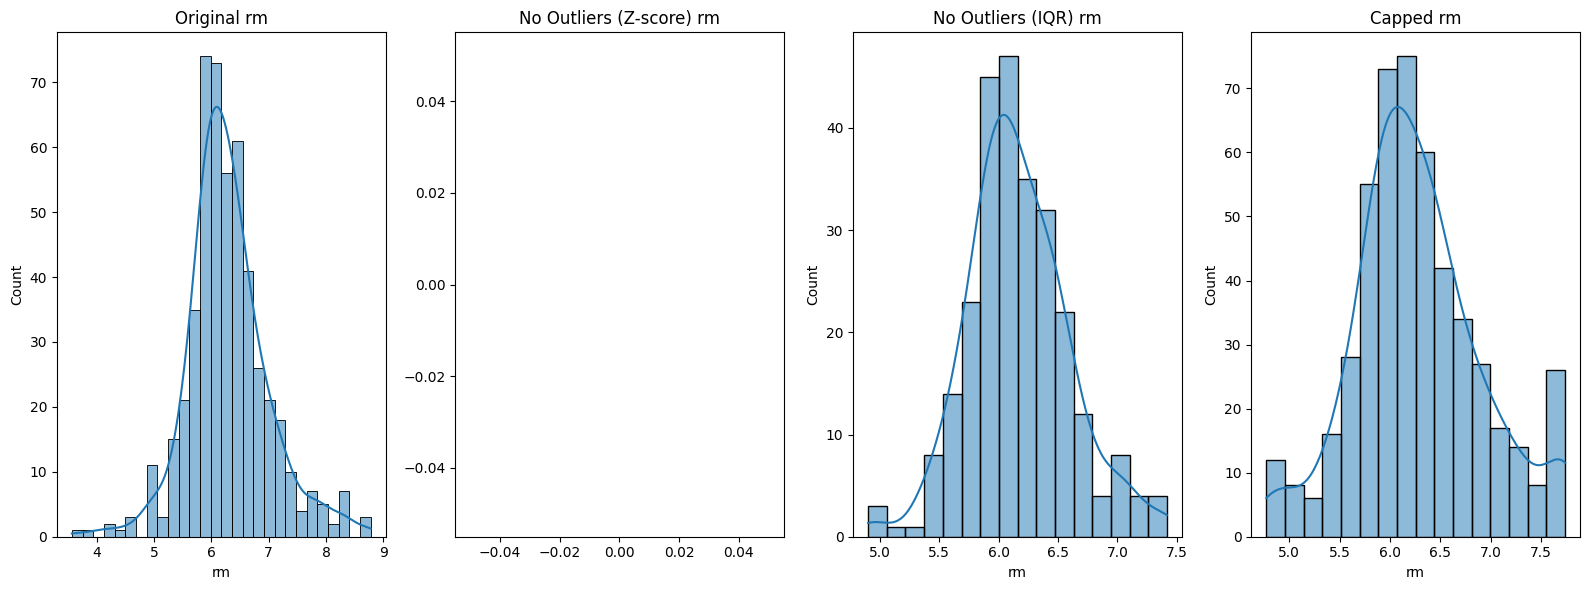

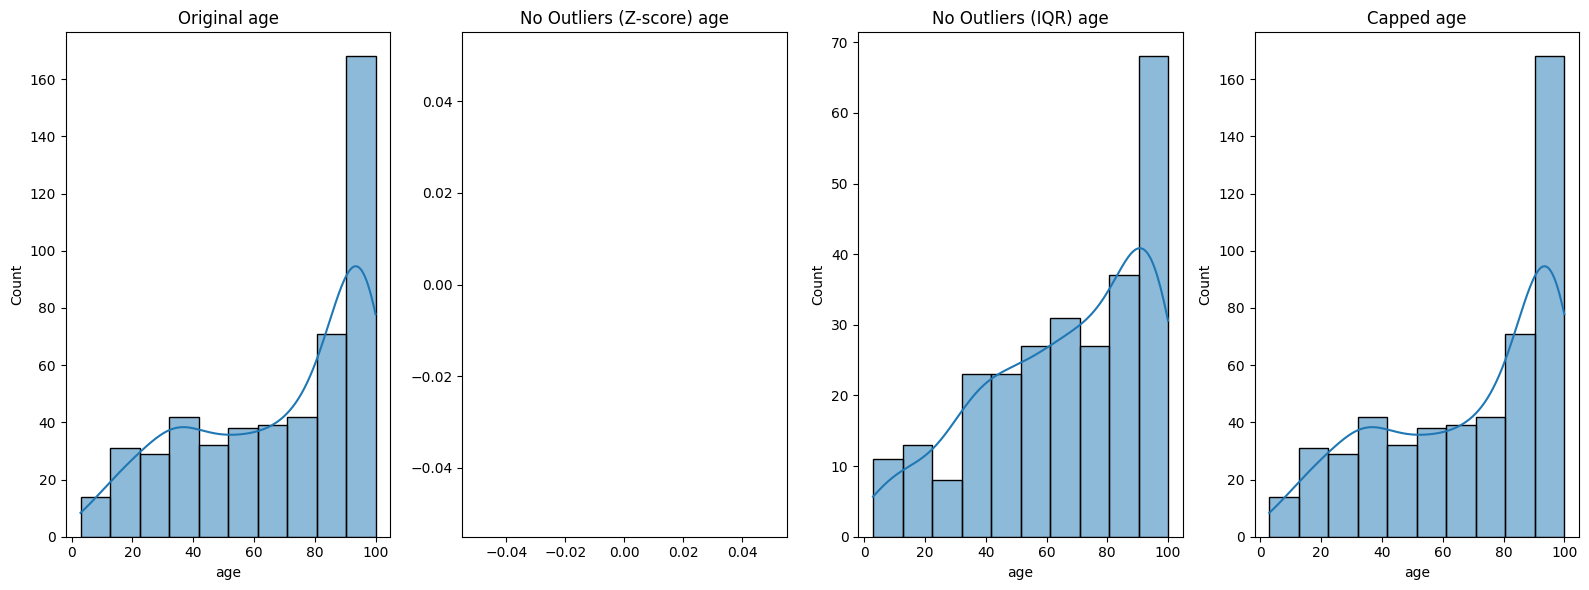

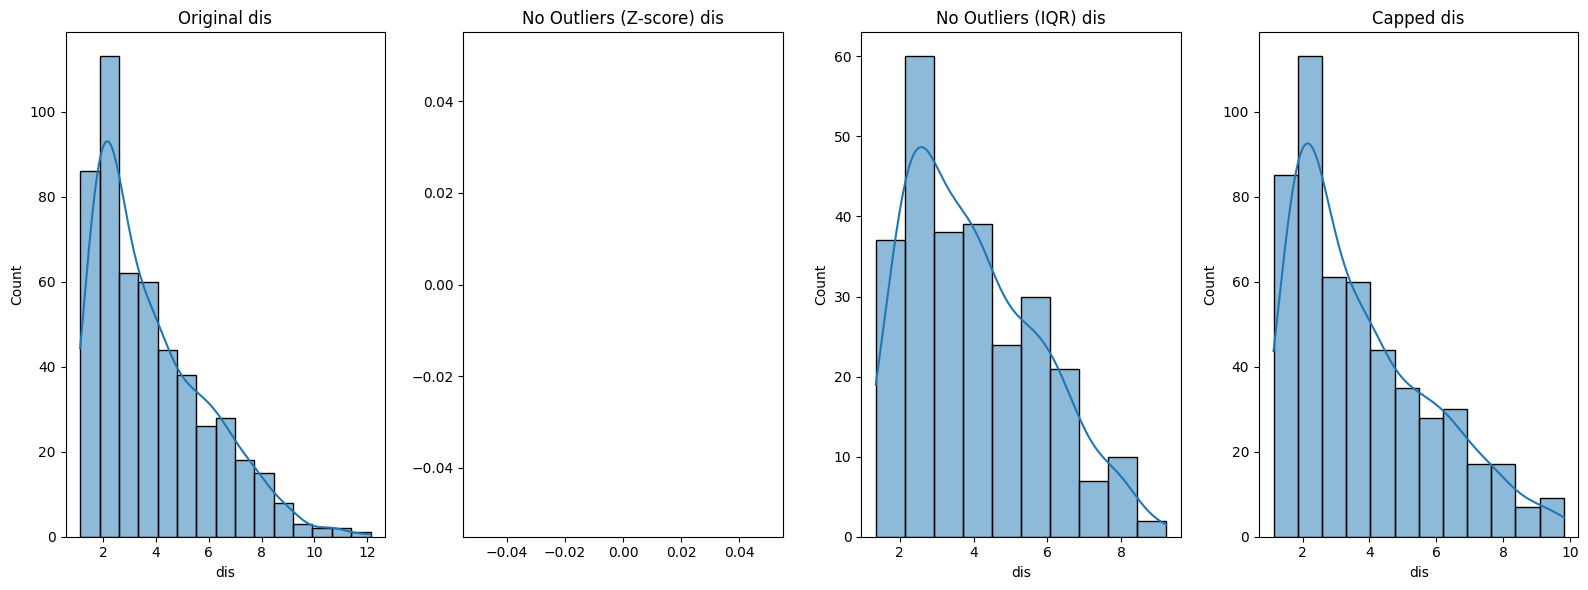

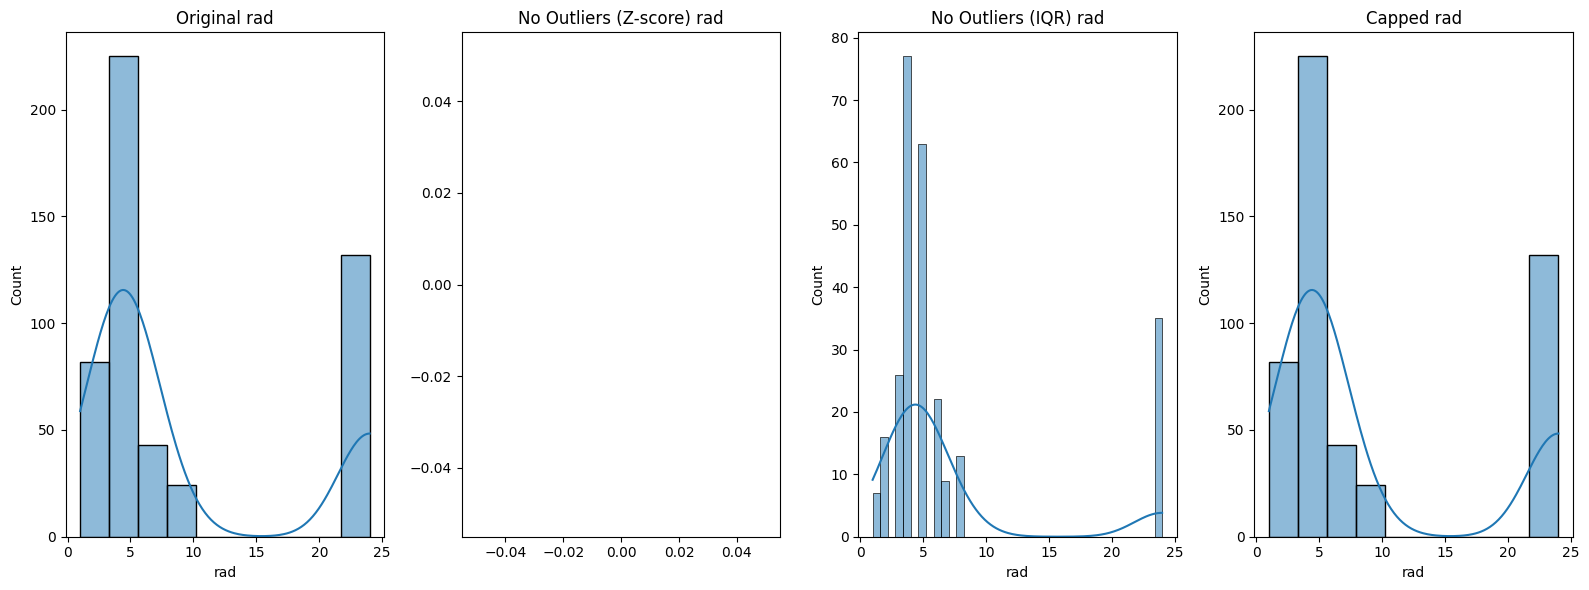

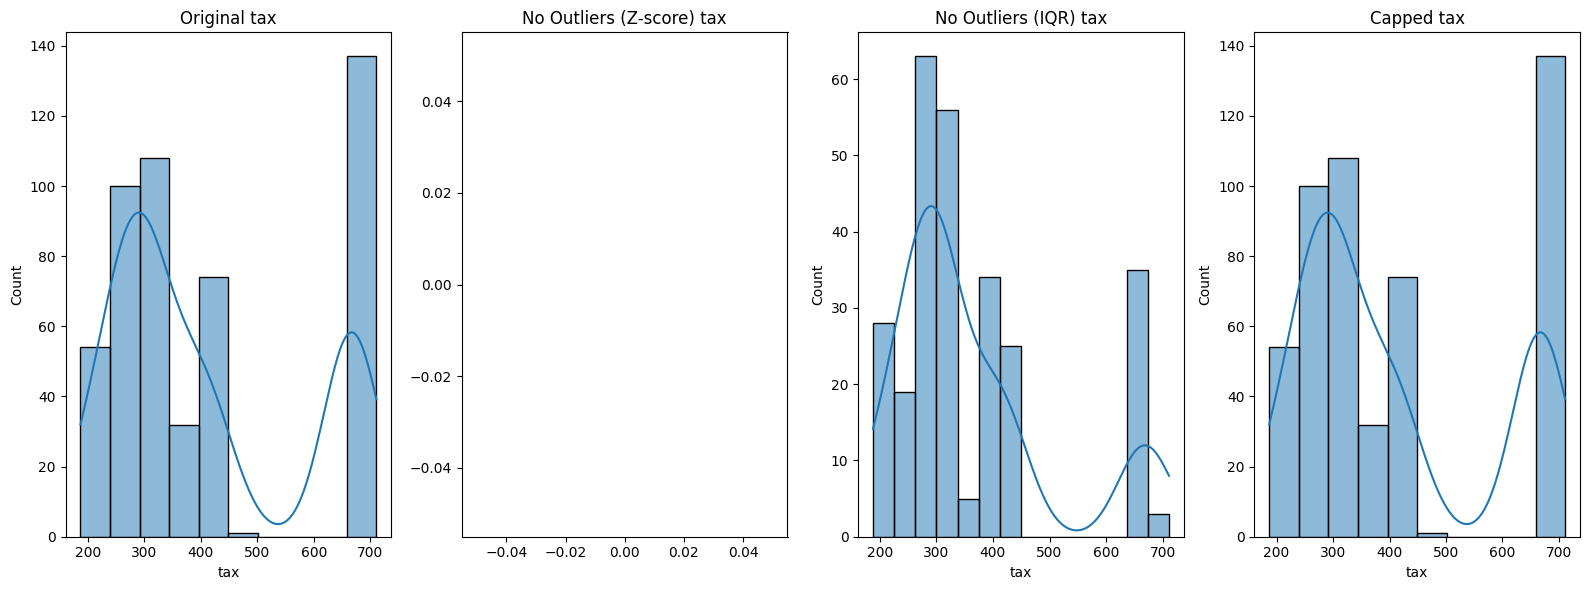

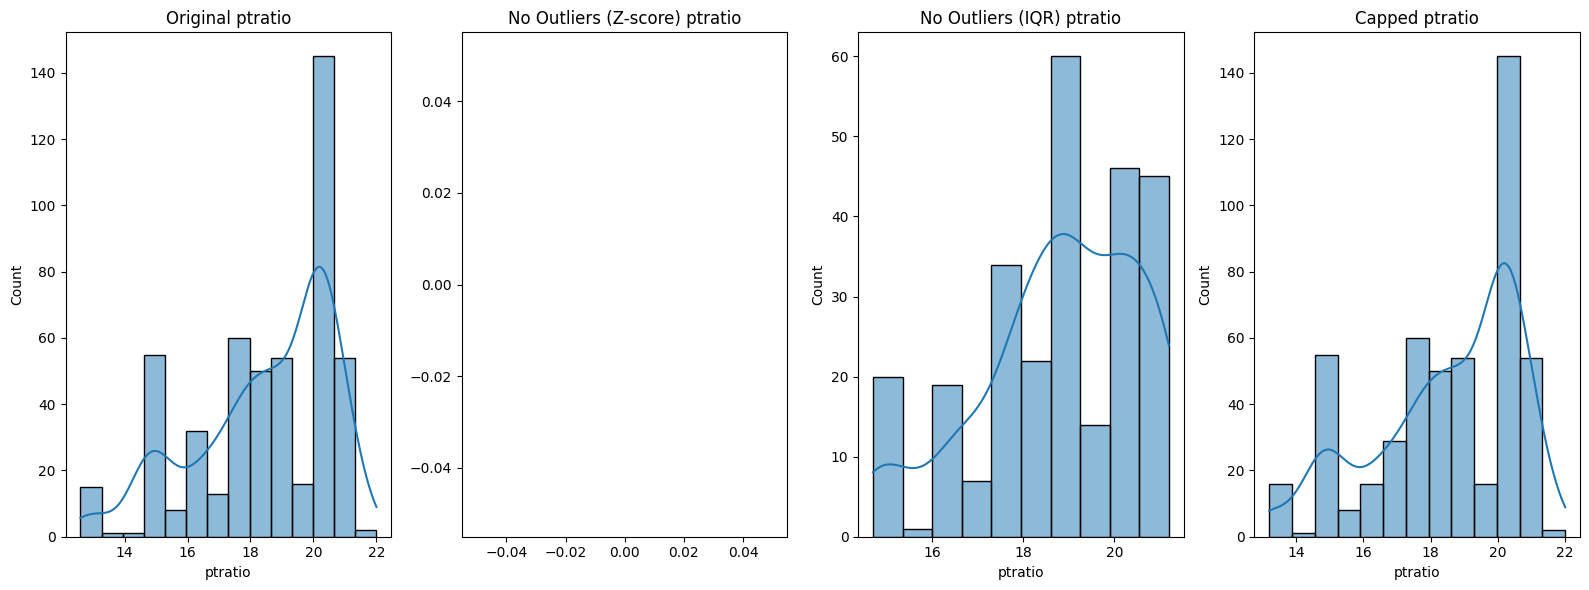

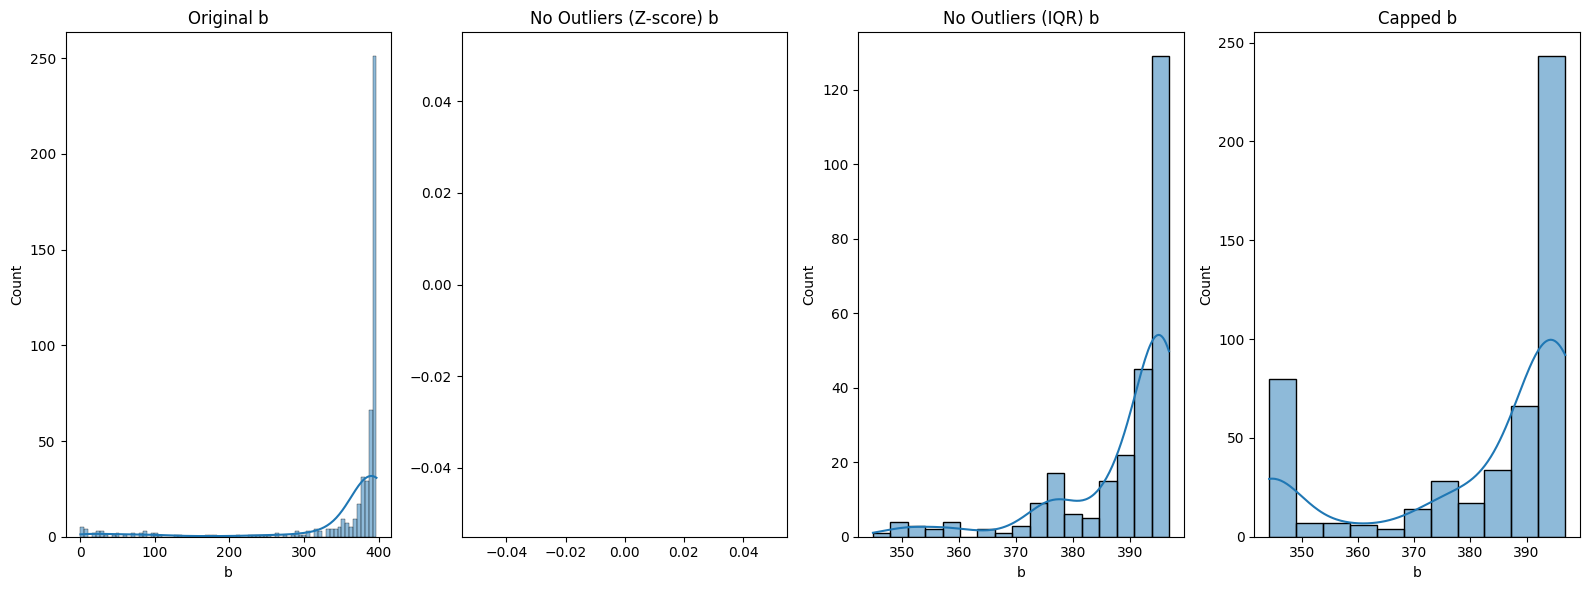

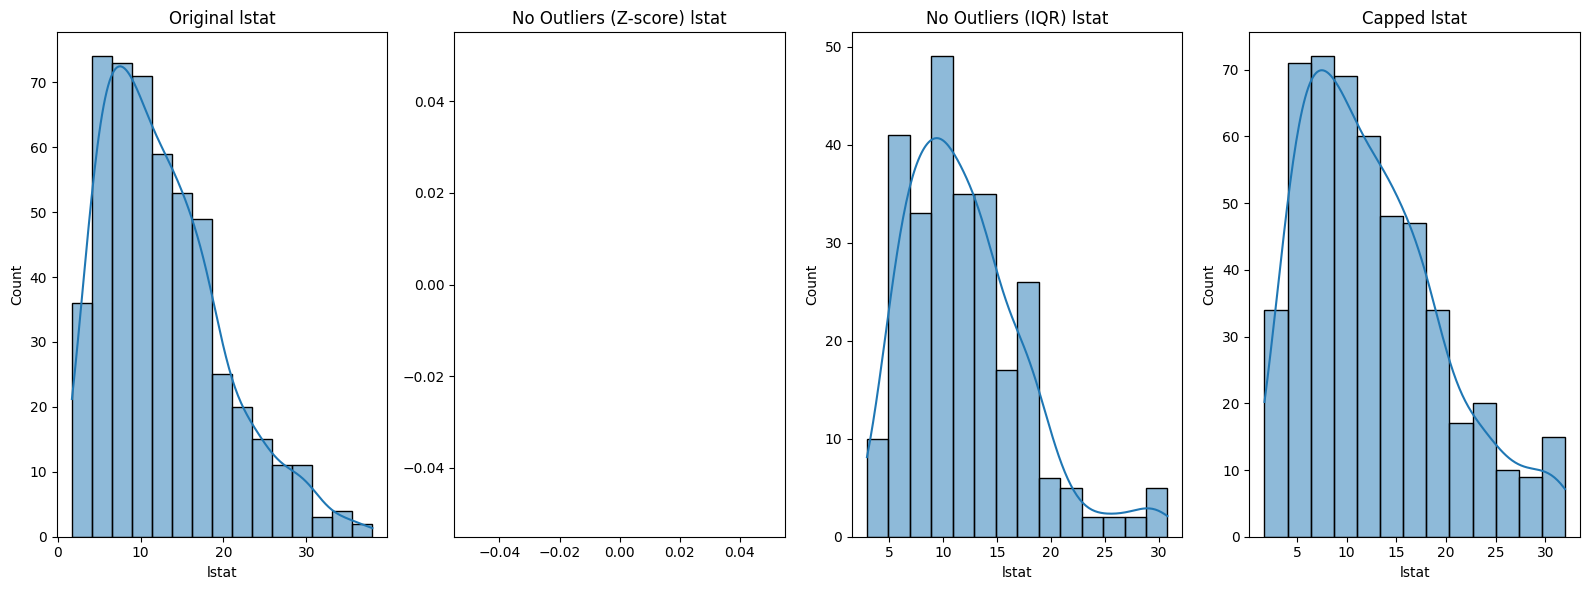

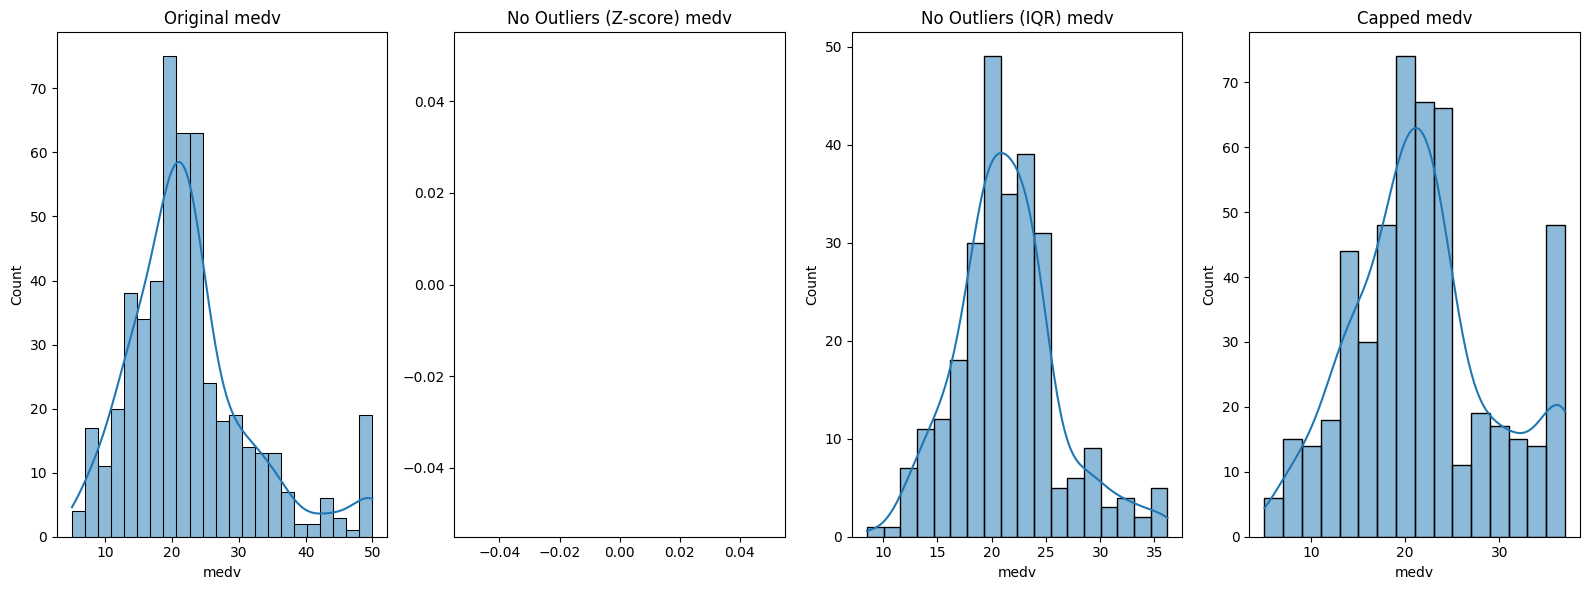

In [7]:
# Visualizing the data before and after handling outliers
def compare_distributions(original, no_outliers_z, no_outliers_iqr, capped, columns):
    for column in columns:
        plt.figure(figsize=(16, 6))
        
        plt.subplot(1, 4, 1)
        sns.histplot(original[column], kde=True)
        plt.title(f'Original {column}')
        
        plt.subplot(1, 4, 2)
        sns.histplot(no_outliers_z[column], kde=True)
        plt.title(f'No Outliers (Z-score) {column}')
        
        plt.subplot(1, 4, 3)
        sns.histplot(no_outliers_iqr[column], kde=True)
        plt.title(f'No Outliers (IQR) {column}')
        
        plt.subplot(1, 4, 4)
        sns.histplot(capped[column], kde=True)
        plt.title(f'Capped {column}')
        
        plt.tight_layout()
        plt.show()

# Comparing distributions
compare_distributions(df, df_no_outliers_z, df_no_outliers_iqr, df_capped, numeric_columns)


In [10]:
import pandas as pd
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer


df = pd.read_csv('retail_sales_dataset.csv')

# Impute categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)


numeric_columns = df.select_dtypes(include=['number']).columns


imputer = KNNImputer(n_neighbors=5)


df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

print(df.head())


   Transaction ID        Date Customer ID  Gender   Age Product Category  \
0             1.0  2023-11-24     CUST001    Male  34.0           Beauty   
1             2.0  2023-02-27     CUST002  Female  26.0         Clothing   
2             3.0  2023-01-13     CUST003    Male  50.0      Electronics   
3             4.0  2023-05-21     CUST004    Male  37.0         Clothing   
4             5.0  2023-05-06     CUST005    Male  30.0           Beauty   

   Quantity  Price per Unit  Total Amount  
0       3.0            50.0         150.0  
1       2.0           500.0        1000.0  
2       1.0            30.0          30.0  
3       1.0           500.0         500.0  
4       2.0            50.0         100.0  


In [12]:
#Feature Engineering in the Heart Disease Dataset
import pandas as pd

# Load the Heart Disease dataset
df = pd.read_csv('heart.csv')

# Age Groups
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Cholesterol Levels
chol_bins = [0, 200, 240, 500]
chol_labels = ['Desirable', 'Borderline High', 'High']
df['chol_level'] = pd.cut(df['chol'], bins=chol_bins, labels=chol_labels, right=False)

# High Blood Pressure
df['high_bp'] = df['trestbps'].apply(lambda x: 1 if x > 130 else 0)

# Interaction Features
df['age_chol_interaction'] = df['age'] * df['chol']
df['age_trestbps_interaction'] = df['age'] * df['trestbps']

# Displaying the new features
print(df.head())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_group       chol_level  high_bp  age_chol_interaction  \
0   2     3       0    Senior  Borderline High        0                 11024   
1   0     3       0    Senior  Borderline High        1                 10759   
2   0     3       0   Elderly        Desirable        1                 12180   
3   1     3       0   Elderly  Borderline High        1                 12383   
4   3     2       0   Elderly             High        1                 18228   

   age_trestbps_interactio

In [16]:
#Transforming Variables in the Bike Sharing Dataset
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('bike_sharing.csv')


In [15]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


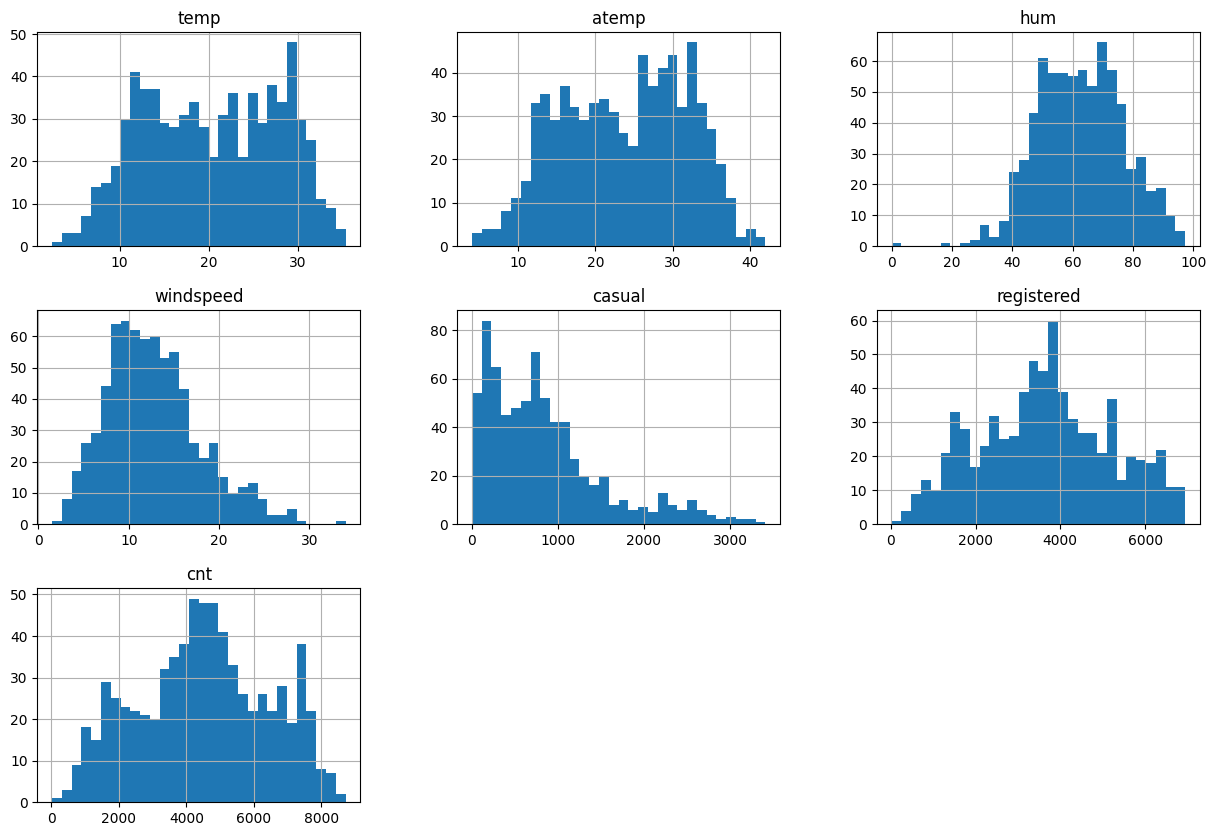

In [17]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Plot histograms
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.show()


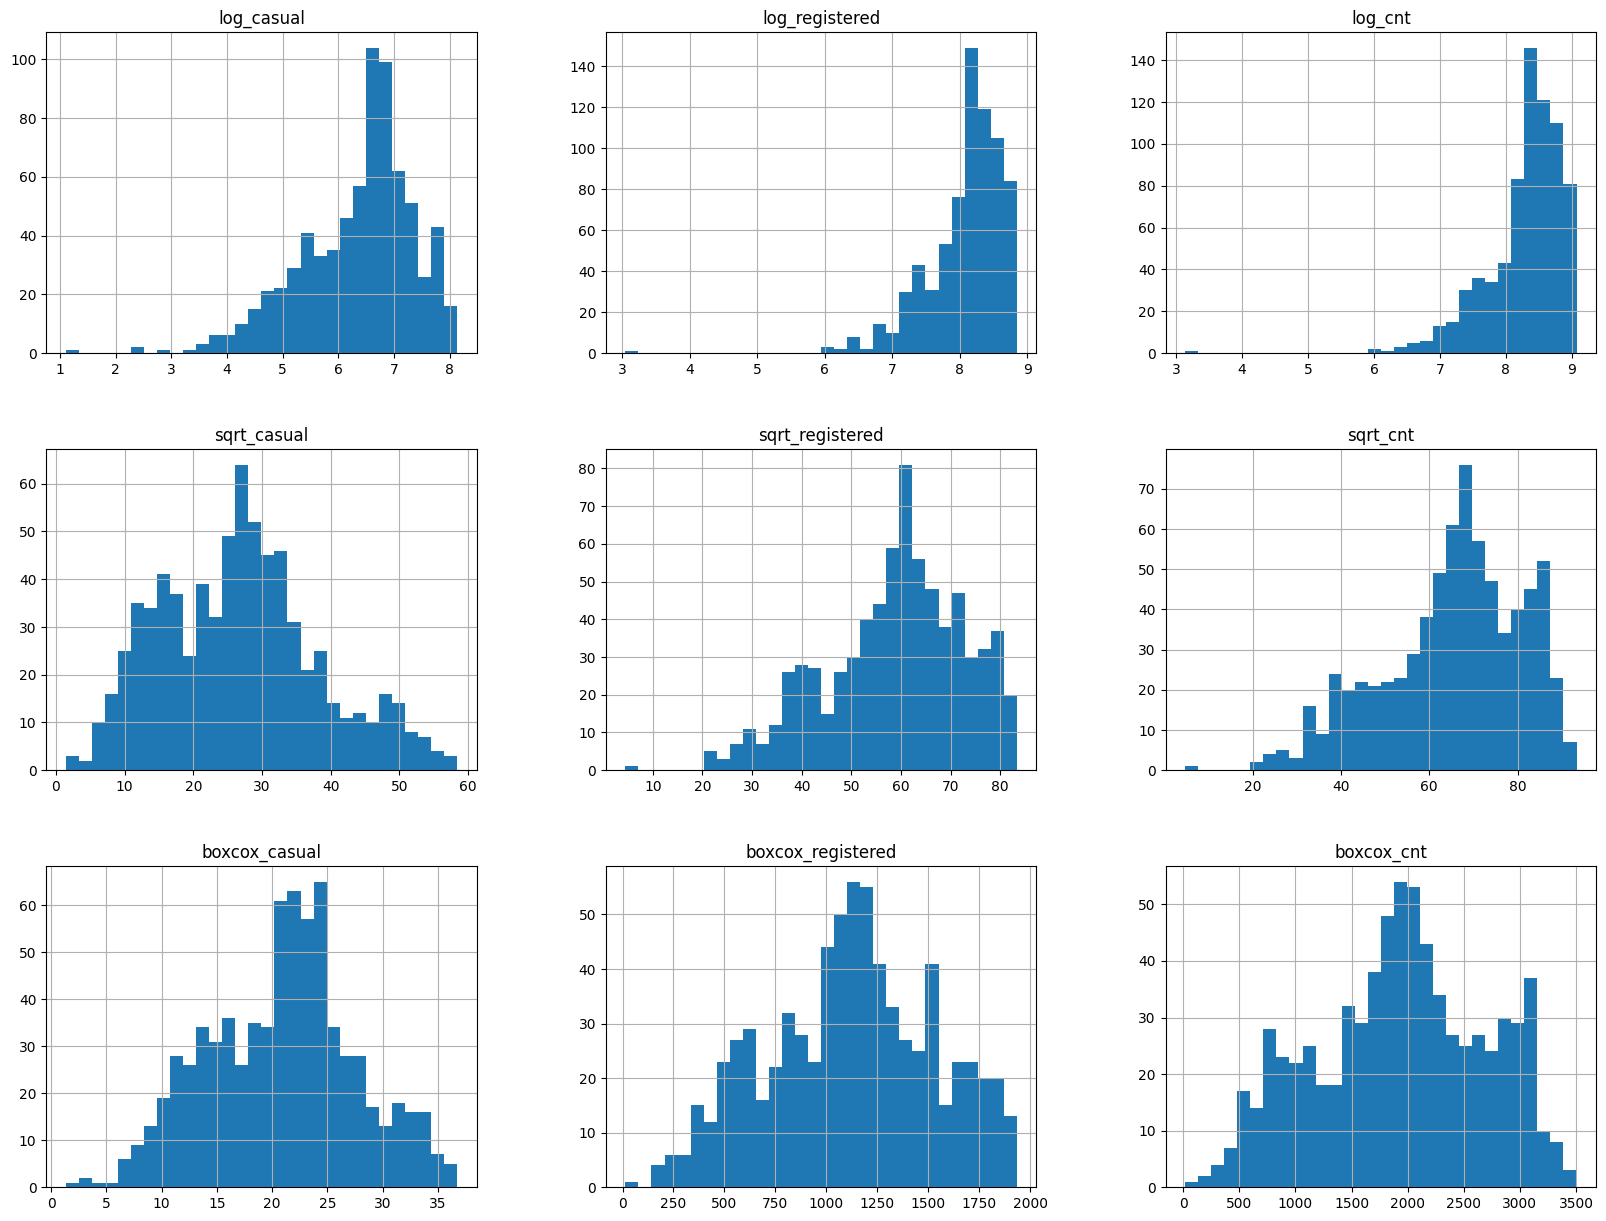

In [18]:
# Applying Log Transformation (adding 1 to avoid log(0))
df['log_casual'] = np.log1p(df['casual'])
df['log_registered'] = np.log1p(df['registered'])
df['log_cnt'] = np.log1p(df['cnt'])

# Applying  Square Root Transformation
df['sqrt_casual'] = np.sqrt(df['casual'])
df['sqrt_registered'] = np.sqrt(df['registered'])
df['sqrt_cnt'] = np.sqrt(df['cnt'])

# Applying Box-Cox Transformation 
df['boxcox_casual'], _ = boxcox(df['casual'] + 1)
df['boxcox_registered'], _ = boxcox(df['registered'] + 1)
df['boxcox_cnt'], _ = boxcox(df['cnt'] + 1)

# Plotting transformed histograms
transformed_cols = ['log_casual', 'log_registered', 'log_cnt', 'sqrt_casual', 'sqrt_registered', 'sqrt_cnt', 'boxcox_casual', 'boxcox_registered', 'boxcox_cnt']
df[transformed_cols].hist(bins=30, figsize=(20, 15))
plt.show()


In [12]:
#Feature Selection in the Diabetes Dataset
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('diabetes.csv')

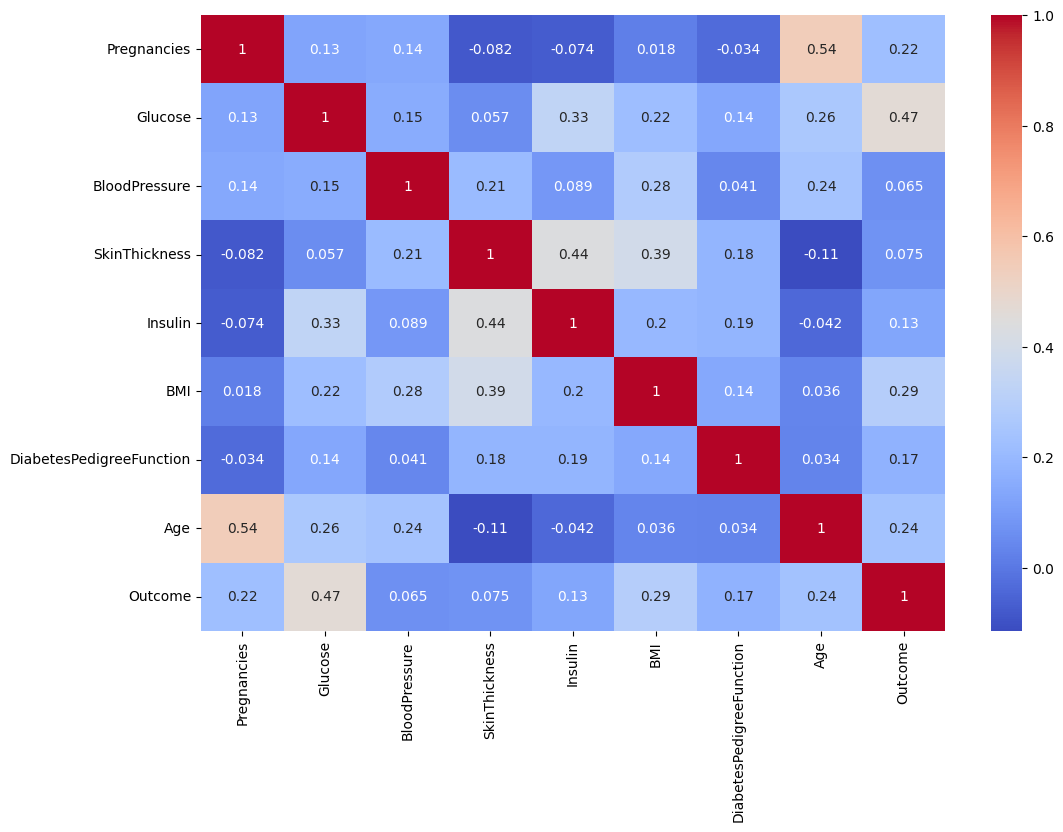

In [9]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Dropping highly correlated features
# Assuming a threshold of 0.75 for high correlation
threshold = 0.75
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i, j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = correlation_matrix.columns[columns].tolist()

# Ensuring 'Outcome' is in the selected columns
if 'Outcome' not in selected_columns:
    selected_columns.append('Outcome')


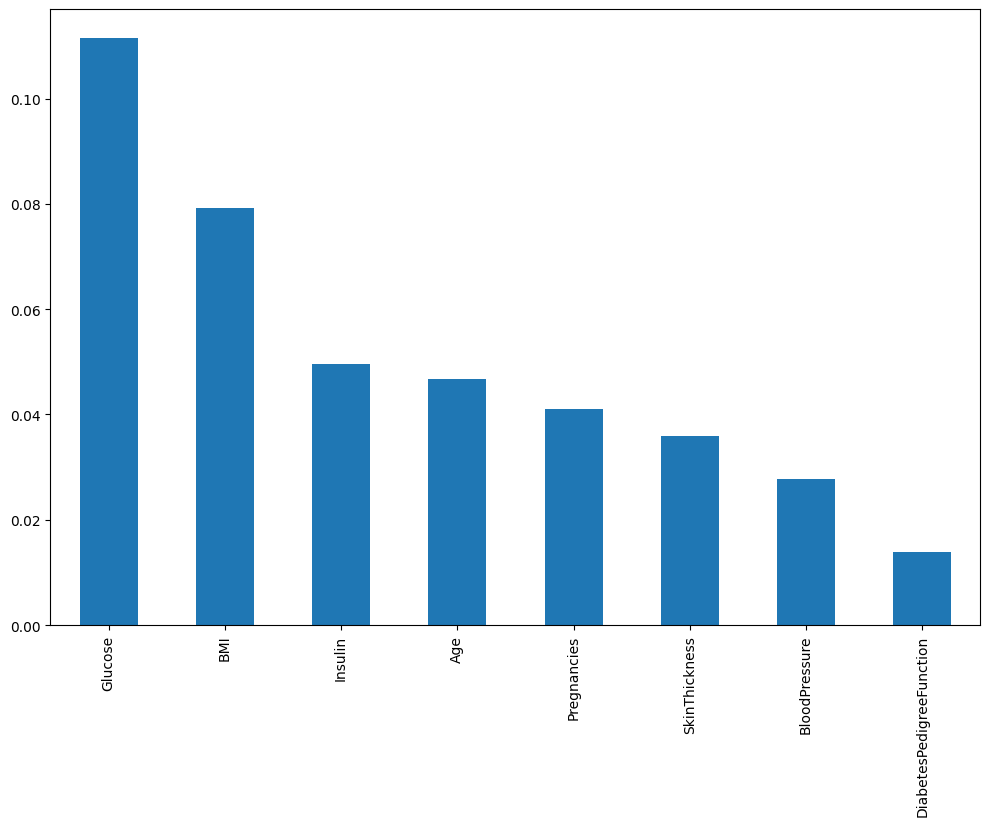

In [10]:
# Mutual Information
X = data[selected_columns].drop('Outcome', axis=1)
y = data['Outcome']
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False).plot.bar(figsize=(12, 8))
plt.show()

In [11]:
# Selecting features with higher mutual information scores
# Ensuring at least two features are selected for RFE
selected_features_mi = mutual_info_series[mutual_info_series > 0.1].index.tolist()
if len(selected_features_mi) < 2:
    selected_features_mi = mutual_info_series.sort_values(ascending=False).index[:2].tolist()

# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
# Adjusting n_features_to_select to be the minimum of 5 or the number of selected features
n_features_to_select = min(5, len(selected_features_mi))
rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe.fit(X[selected_features_mi], y)
selected_features_rfe = X[selected_features_mi].columns[rfe.support_].tolist()

print("Selected Features after Correlation Analysis:", selected_columns)
print("Selected Features after Mutual Information:", selected_features_mi)
print("Selected Features after RFE:", selected_features_rfe)

Selected Features after Correlation Analysis: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Selected Features after Mutual Information: ['Glucose', 'BMI']
Selected Features after RFE: ['Glucose', 'BMI']


Original class distribution: Counter({0: 199020, 1: 344})
SMOTE class distribution: Counter({0: 199020, 1: 199020})
ADASYN class distribution: Counter({0: 199020, 1: 198921})
Undersampling class distribution: Counter({0: 344, 1: 344})


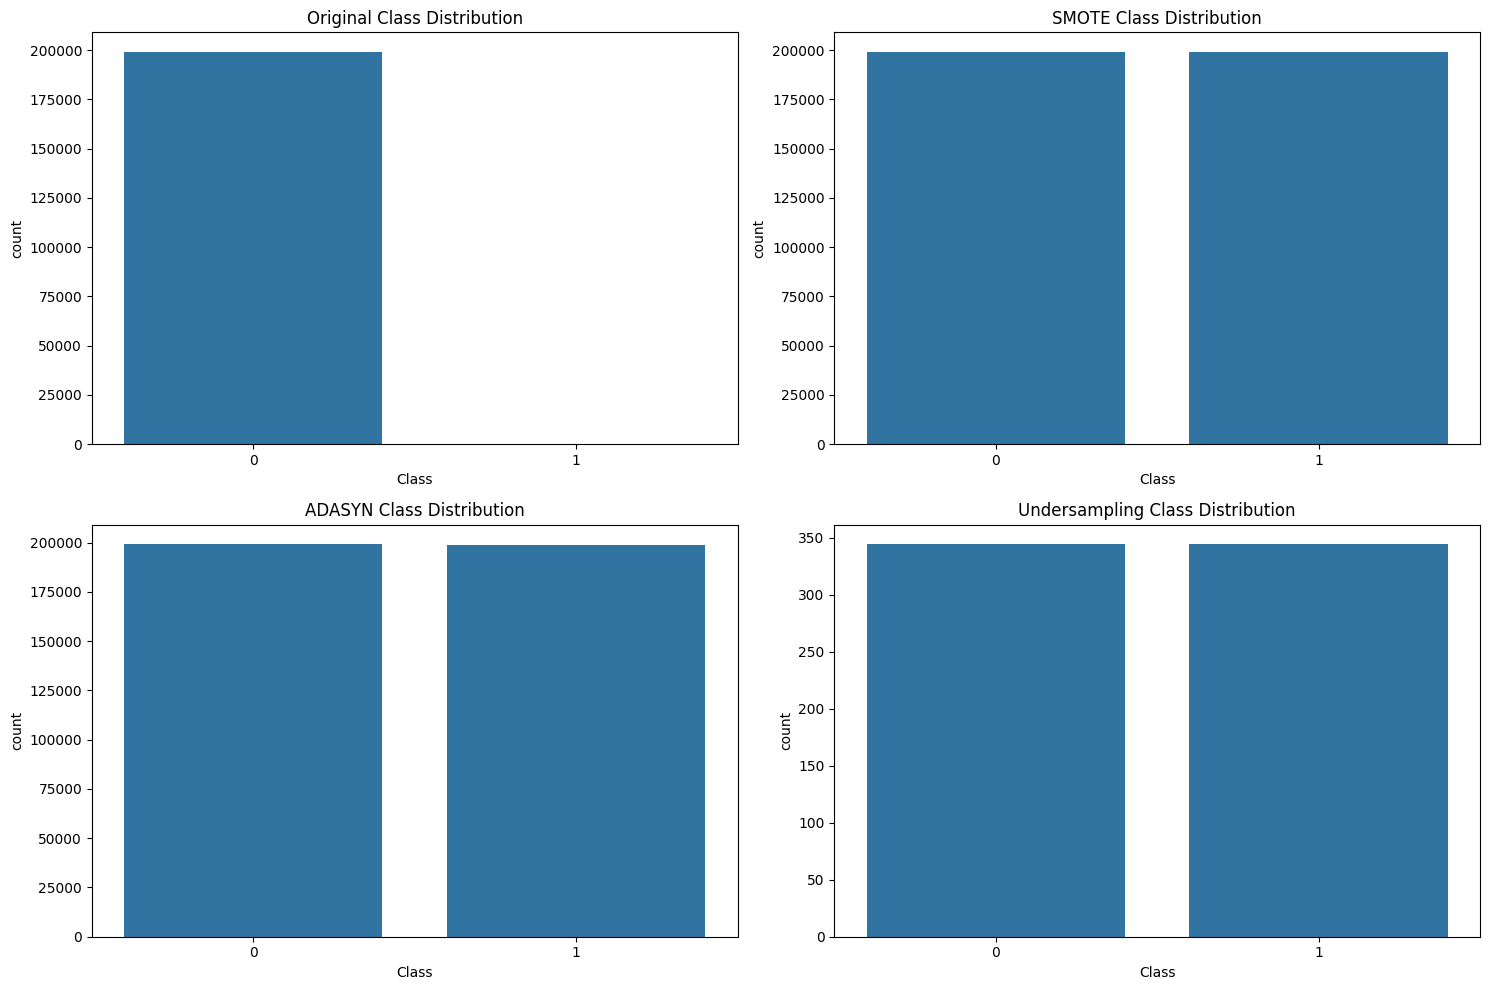

In [4]:
# Dealing with Imbalanced Data in the Credit Card Fraud Detection Datase
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('creditcard.csv')

# Separating features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Original class distribution
print("Original class distribution:", Counter(y_train))

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("SMOTE class distribution:", Counter(y_smote))

# ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
print("ADASYN class distribution:", Counter(y_adasyn))

# Undersampling
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)
print("Undersampling class distribution:", Counter(y_under))

# Visualize the class distributions
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x=y_train, ax=ax[0, 0])
ax[0, 0].set_title('Original Class Distribution')
sns.countplot(x=y_smote, ax=ax[0, 1])
ax[0, 1].set_title('SMOTE Class Distribution')
sns.countplot(x=y_adasyn, ax=ax[1, 0])
ax[1, 0].set_title('ADASYN Class Distribution')
sns.countplot(x=y_under, ax=ax[1, 1])
ax[1, 1].set_title('Undersampling Class Distribution')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Load the dataset
car_data = pd.read_csv('car_evaluation.csv')

# Display the first few rows
print("Original Car Evaluation Data:")
print(car_data.head())


Original Car Evaluation Data:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [2]:
# Check the structure of the dataset
print("\nData Types:")
print(car_data.dtypes)

# Check for missing values
print("\nMissing Values:")
print(car_data.isnull().sum())



Data Types:
vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

Missing Values:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [3]:
# One-Hot Encoding
car_data_one_hot = pd.get_dummies(car_data)

# Display the first few rows of the one-hot encoded data
print("\nOne-Hot Encoded Data:")
print(car_data_one_hot.head())



One-Hot Encoded Data:
   vhigh_high  vhigh_low  vhigh_med  vhigh_vhigh  vhigh.1_high  vhigh.1_low  \
0       False      False      False         True         False        False   
1       False      False      False         True         False        False   
2       False      False      False         True         False        False   
3       False      False      False         True         False        False   
4       False      False      False         True         False        False   

   vhigh.1_med  vhigh.1_vhigh   2_2    2_3  ...  small_big  small_med  \
0        False           True  True  False  ...      False      False   
1        False           True  True  False  ...      False      False   
2        False           True  True  False  ...      False       True   
3        False           True  True  False  ...      False       True   
4        False           True  True  False  ...      False       True   

   small_small  low_high  low_low  low_med  unacc_acc  unacc_go

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for label encoding
car_data_label_encoded = car_data.copy()

# Apply label encoding to each categorical feature
label_encoders = {}
for column in car_data_label_encoded.columns:
    label_encoders[column] = LabelEncoder()
    car_data_label_encoded[column] = label_encoders[column].fit_transform(car_data_label_encoded[column])

# Display the first few rows of the label encoded data
print("\nLabel Encoded Data:")
print(car_data_label_encoded.head())



Label Encoded Data:
   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2


In [5]:
# Compare the original, one-hot encoded, and label encoded data
print("\nOriginal Data Shape:", car_data.shape)
print("One-Hot Encoded Data Shape:", car_data_one_hot.shape)
print("Label Encoded Data Shape:", car_data_label_encoded.shape)

# Summary statistics
print("\nOriginal Data Summary:")
print(car_data.describe(include='all'))

print("\nOne-Hot Encoded Data Summary:")
print(car_data_one_hot.describe(include='all'))

print("\nLabel Encoded Data Summary:")
print(car_data_label_encoded.describe(include='all'))



Original Data Shape: (1727, 7)
One-Hot Encoded Data Shape: (1727, 25)
Label Encoded Data Shape: (1727, 7)

Original Data Summary:
       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209

One-Hot Encoded Data Summary:
       vhigh_high vhigh_low vhigh_med vhigh_vhigh vhigh.1_high vhigh.1_low  \
count        1727      1727      1727        1727         1727        1727   
unique          2         2         2           2            2           2   
top         False     False     False       False        False       False   
freq         1295      1295      1295        1296         1295        1295   

       vhigh.1_med vhigh.1_vhigh    2_2    2_3  ... small_big small_med  \
count         1727          1727   1727   1727  ...      1727      1727   
unique           2             2     

In [2]:
import pandas as pd

# Loading the datasets
movies = pd.read_csv('movie.csv') 
links = pd.read_csv('movie_lens.csv')   
tags = pd.read_csv('tag.csv')     
ratings = pd.read_csv('rating.csv') 


In [4]:
# Merging movies with links
movies_links = pd.merge(movies, links, on='movieId', how='left')

# Merging movies_links with tags
movies_links_tags = pd.merge(movies_links, tags, on='movieId', how='left')

# Merging the result with ratings
full_dataset = pd.merge(movies_links_tags, ratings, on=['movieId', 'userId'], how='left')


In [3]:
# Checking for missing values
missing_values = full_dataset.isnull().sum()
print(missing_values)

# Filling missing values in 'tag' with an empty string
full_dataset['tag'] = full_dataset['tag'].fillna('')


movieId            0
title              0
genres             0
imdbId         61568
tmdbId         61638
userId          7733
tag             7749
timestamp_x     7733
rating         81852
timestamp_y    81852
dtype: int64


In [11]:
import pandas as pd
from sklearn.impute import KNNImputer

columns_to_drop = ['imdbId', 'tmdbId']
existing_columns_to_drop = [col for col in columns_to_drop if col in full_dataset.columns]

# Dropping columns that exist
if existing_columns_to_drop:
    full_dataset.drop(columns=existing_columns_to_drop, inplace=True)

# Converting date columns to datetime format
full_dataset['timestamp_x'] = pd.to_datetime(full_dataset['timestamp_x'], errors='coerce')
full_dataset['timestamp_y'] = pd.to_datetime(full_dataset['timestamp_y'], errors='coerce')

# Forward fill for userId, tag, and timestamp_x
full_dataset['userId'] = full_dataset['userId'].ffill()
full_dataset['tag'] = full_dataset['tag'].ffill()
full_dataset['timestamp_x'] = full_dataset['timestamp_x'].ffill()

# Impute rating using mean
full_dataset['rating'] = full_dataset['rating'].fillna(full_dataset['rating'].mean())

# Forward fill for timestamp_y
full_dataset['timestamp_y'] = full_dataset['timestamp_y'].ffill()

# Separating numeric columns for KNN Imputation
numeric_columns = full_dataset.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=5)
full_dataset[numeric_columns] = imputer.fit_transform(full_dataset[numeric_columns])

print(full_dataset.isnull().sum())


movieId        0
title          0
genres         0
userId         0
tag            0
timestamp_x    0
rating         0
timestamp_y    0
dtype: int64
